# Predictive Model for Hotel Reservation Cancellation Probability <br/>
Program author: Agata Szymikowska <br/>
Machine Learning Techniques <br/>
<br/>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel_booking = pd.read_csv('hotel_booking.csv', delimiter=',')

In [3]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
print("Dataset contains",hotel_booking.shape[0], "observations and", hotel_booking.shape[1], "variables")

Dataset contains 119390 observations and 36 variables


In [5]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
dane = hotel_booking.copy()

In [8]:
dane['agent'] = dane['agent'].fillna(0)
dane['company'] = dane['company'].fillna(0)
dane['children'] = dane['children'].fillna(0)

In [9]:
dane = dane.drop('name', axis=1)
dane = dane.drop('email', axis=1)
dane = dane.drop('phone-number', axis=1)
dane = dane.drop('credit_card', axis=1)

In [10]:
dane = dane.dropna()

In [11]:
dane.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [12]:
dane[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
      'adults', 'children', 'babies','previous_cancellations',
      'previous_bookings_not_canceled', 'booking_changes',
      'days_in_waiting_list','adr','required_car_parking_spaces',
      'total_of_special_requests']].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,104.308027,0.928891,2.502136,1.858404,0.104203,0.007948,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706
std,106.903127,0.996211,1.900165,0.578576,0.399166,0.097379,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,161.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
def summary_table(column1):
    c1 = dane[column1].value_counts()
    c2 = dane[column1].loc[dane.is_canceled==0].value_counts()
    c3 = dane[column1].loc[dane.is_canceled==1].value_counts()
    c4 = (dane[column1].loc[dane.is_canceled==1].value_counts()*100)/dane[column1].value_counts()
    ret = pd.DataFrame({"All reservations":c1,"Cancelled":c3, "Not cancelled":c2, "Percentage of cancelled":c4})
    ret = ret.fillna(0)
    return print(ret)

In [14]:
dane2 = dane.copy()

# Variable 'is_canceled'

Target variable <br/>
1 - reservation was canceled <br/>
0 - reservation was not canceled

In [15]:
sns.set_theme(style="darkgrid")

0    0.628627
1    0.371373
Name: is_canceled, dtype: float64


<AxesSubplot:ylabel='is_canceled'>

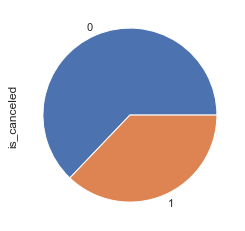

In [16]:
print(dane.is_canceled.value_counts(normalize = True))
dane.is_canceled.value_counts(normalize = True).plot.pie()

# Variable 'hotel'

Hotel Type - Resort or City <br/>
Cancellations are significantly less frequent in resorts

              All reservations  Cancelled  Not cancelled  \
City Hotel               79306      33080          46226   
Resort Hotel             39596      11077          28519   

              Percentage of cancelled  
City Hotel                  41.711850  
Resort Hotel                27.975048  
count         118902
unique             2
top       City Hotel
freq           79306
Name: hotel, dtype: object


<AxesSubplot:xlabel='hotel', ylabel='Count'>

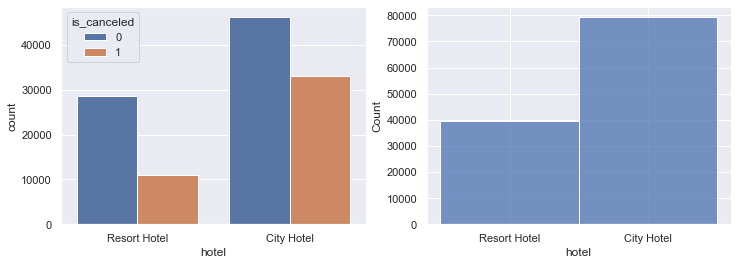

In [17]:
summary_table("hotel")
print(dane['hotel'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.set_theme(style="darkgrid")
sns.countplot(data=dane, x='hotel', hue=dane['is_canceled'].astype(str) ,ax=ax[0])
sns.histplot(data=dane, x='hotel', ax=ax[1])

# Variable 'lead_time'

Days between Booking and Arrival <br/>
IQR (Interqiartile Range) = 143 <br/>
The earlier is the booking, the higher the cancellation probability <br/>
Almost 68% of reservations made more than a year in advance were canceled

     All reservations  Cancelled  Not cancelled  Percentage of cancelled
0                6223      416.0         5807.0                 6.684879
1                3395      319.0         3076.0                 9.396171
2                2034      211.0         1823.0                10.373648
3                1802      181.0         1621.0                10.044395
4                1696      173.0         1523.0                10.200472
..                ...        ...            ...                      ...
622                17       17.0            0.0               100.000000
626                30       30.0            0.0               100.000000
629                17       17.0            0.0               100.000000
709                 1        0.0            1.0                 0.000000
737                 1        0.0            1.0                 0.000000

[479 rows x 4 columns]
count    118902.000000
mean        104.308027
std         106.903127
min           0.000000
25%     

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

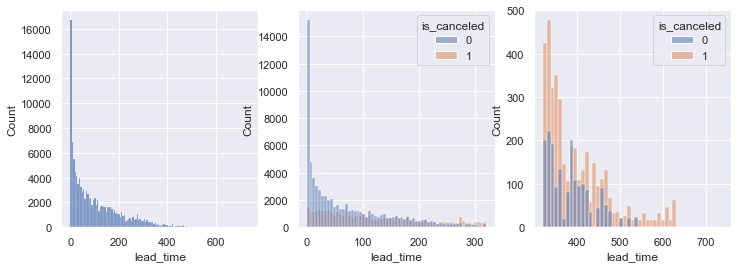

In [18]:
summary_table("lead_time")
print(dane['lead_time'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(data=dane, x='lead_time',ax=ax[0])
sns.histplot(data=dane, x=dane[dane.lead_time<dane.lead_time.quantile(0.95)].lead_time,hue='is_canceled', ax=ax[1])
sns.histplot(data=dane, x=dane[dane.lead_time>dane.lead_time.quantile(0.95)].lead_time,hue='is_canceled', ax=ax[2])

In [19]:
dane_over_year = dane.loc[dane['lead_time']>364]

1    0.679739
0    0.320261
Name: is_canceled, dtype: float64


<AxesSubplot:ylabel='is_canceled'>

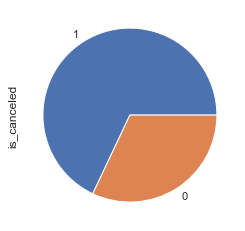

In [20]:
print(dane_over_year.is_canceled.value_counts(normalize = True))
sns.set_theme(style="darkgrid")
dane_over_year.is_canceled.value_counts(normalize = True).plot.pie()

# Variable 'arrival_date_month'

Month of arrival <br/>
Most bookings are made for August and July <br/>
Least bookings occur in January

In [21]:
dane['arrival_date_month'] = pd.Series(dane['arrival_date_month'].replace(['January', 'February','March', 'April', 'May', 'June', 'July', 'August','September', 'October','November','December'], [1,2,3,4,5,6,7,8,9,10,11,12]))

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
1               5874       1806           4068                30.745659
2               8012       2695           5317                33.637044
3               9739       3148           6591                32.323647
4              11045       4512           6533                40.851064
5              11779       4677           7102                39.706257
6              10927       4534           6393                41.493548
7              12628       4736           7892                37.503959
8              13856       5238           8618                37.803118
9              10467       4100           6367                39.170727
10             11095       4228           6867                38.107256
11              6752       2120           4632                31.398104
12              6728       2363           4365                35.121879
count    118902.000000
mean          6.552934
std           3.08

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

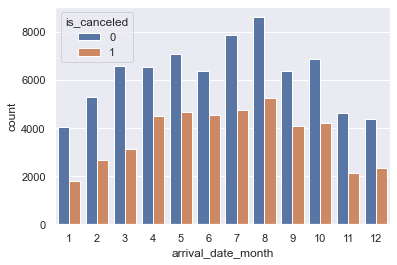

In [22]:
summary_table('arrival_date_month')
print(dane['arrival_date_month'].describe())
sns.countplot(data=dane, x='arrival_date_month', hue=dane['is_canceled'].astype(str))

# variable 'arrival_date_year'

Year of arrival <br/>
Most data comes from 2016, followed by 2017, with the least from 2015 <br/>
The ratio of canceled to non-canceled reservations remains consisten across years

      All reservations  Cancelled  Not cancelled  Percentage of cancelled
2016             56435      20313          36122                35.993621
2017             40604      15734          24870                38.749877
2015             21863       8110          13753                37.094635
count    118902.000000
mean       2016.157617
std           0.707479
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64


<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

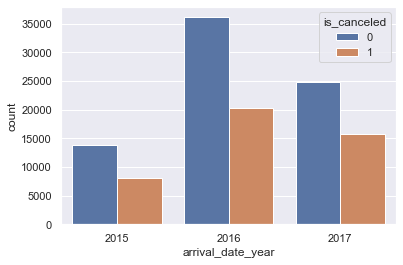

In [23]:
summary_table('arrival_date_year')
print(dane['arrival_date_year'].describe())
sns.countplot(data=dane, x='arrival_date_year', hue=dane['is_canceled'].astype(str))

# Variable 'arrival_date_week_number'

Week of the year <br/>
Highest number of bookings in the second half of August <br/>
Lowest in December and early in the year

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
1               1044        353            691                33.812261
2               1213        394            819                32.481451
3               1300        335            965                25.769231
4               1469        506            963                34.445201
5               1376        425            951                30.886628
6               1486        385           1101                25.908479
7               2095        684           1411                32.649165
8               2203        792           1411                35.950976
9               2106        724           1382                34.377968
10              2142        737           1405                34.407096
11              2060        618           1442                30.000000
12              2065        630           1435                30.508475
13              2408        882           1526                36

<AxesSubplot:xlabel='arrival_date_week_number', ylabel='count'>

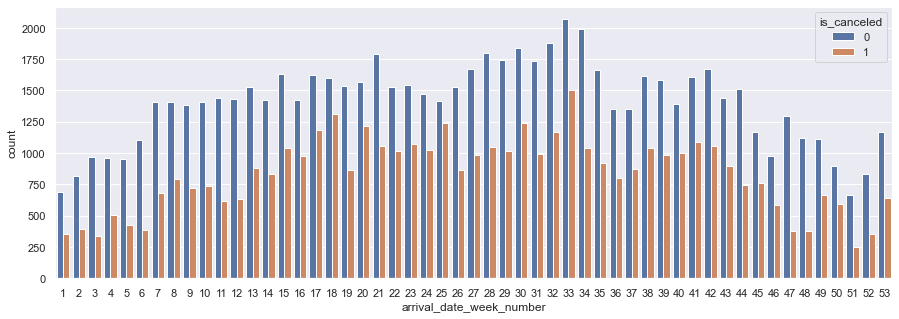

In [24]:
summary_table('arrival_date_week_number')
print(dane['arrival_date_week_number'].describe())
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data=dane, x='arrival_date_week_number', hue='is_canceled')

# Variable 'arrival_date_day_of_month'

Day of month of arrival <br/>
very similar distribution

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
1               3609       1444           2165                40.011083
2               4037       1384           2653                34.282883
3               3834       1544           2290                40.271257
4               3747       1349           2398                36.002135
5               4296       1666           2630                38.780261
6               3813       1274           2539                33.412012
7               3657       1440           2217                39.376538
8               3908       1647           2261                42.144319
9               4082       1550           2532                37.971583
10              3554       1181           2373                33.230163
11              3590       1179           2411                32.841226
12              4077       1544           2533                37.870984
13              3724       1322           2402                35

<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='count'>

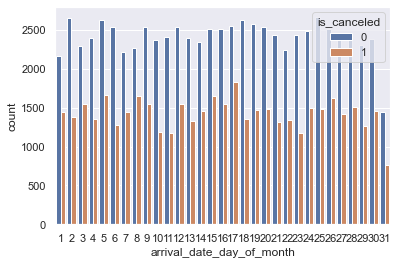

In [25]:
summary_table('arrival_date_day_of_month')
print(dane['arrival_date_day_of_month'].describe())
sns.countplot(data=dane, x='arrival_date_day_of_month', hue='is_canceled')

distribution of reservations during years and months

<AxesSubplot:xlabel='arrival_date_week_number', ylabel='arrival_date_year'>

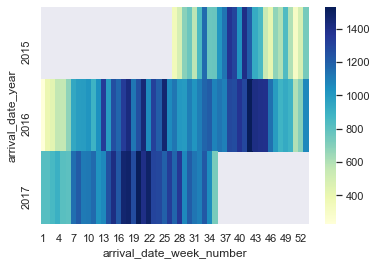

In [26]:
c = dane.groupby("arrival_date_year")["arrival_date_week_number"].value_counts().unstack()
sns.heatmap(data=c,cmap="YlGnBu")

# Variable 'stays_in_weekend_nights'

Number of nights <br/>
Most stays are short, with 95% falling within 0-2 nights <br/>
Longer stays have a higher probability of cancellation

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
0              51682    19463.0          32219                37.659146
1              30527    10999.0          19528                36.030399
2              33250    12466.0          20784                37.491729
3               1253      443.0            810                35.355148
4               1849      597.0           1252                32.287723
5                 78       43.0             35                55.128205
6                153       87.0             66                56.862745
7                 19       14.0              5                73.684211
8                 60       34.0             26                56.666667
9                 11        7.0              4                63.636364
10                 7        2.0              5                28.571429
12                 5        1.0              4                20.000000
13                 3        0.0              3                 0

<AxesSubplot:xlabel='stays_in_weekend_nights'>

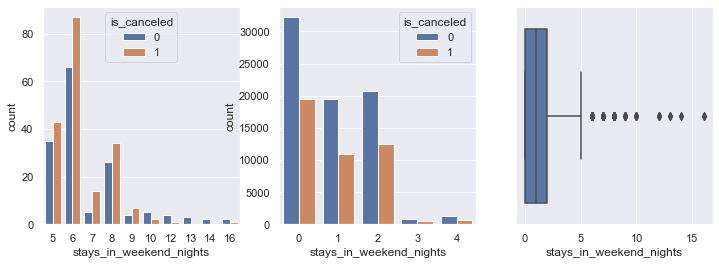

In [27]:
summary_table('stays_in_weekend_nights')
print(dane['stays_in_weekend_nights'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(data=dane, x =dane[dane.stays_in_weekend_nights>4].stays_in_weekend_nights,hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x =dane[dane.stays_in_weekend_nights<=4].stays_in_weekend_nights, hue=dane['is_canceled'].astype(str),ax=ax[1])
sns.boxplot(data=dane, x='stays_in_weekend_nights', ax=ax[2])

# Variable 'stays_in_week_nights'

Number of nights between Monday and Friday <br/>
Most stays are short<br/>
Longer stays have a higher probability of cancellation

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
0               7594     1901.0         5693.0                25.032921
1              30091     9820.0        20271.0                32.634342
2              33576    14869.0        18707.0                44.284608
3              22203     8483.0        13720.0                38.206549
4               9554     3494.0         6060.0                36.571070
5              11052     3847.0         7205.0                34.808180
6               1491      582.0          909.0                39.034205
7               1027      323.0          704.0                31.450828
8                654      219.0          435.0                33.486239
9                231       95.0          136.0                41.125541
10              1030      295.0          735.0                28.640777
11                55       34.0           21.0                61.818182
12                42       23.0           19.0                54

<AxesSubplot:xlabel='stays_in_week_nights'>

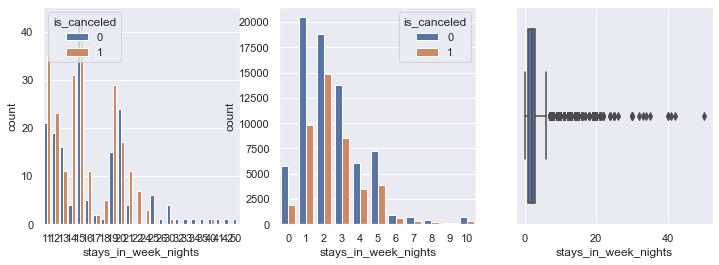

In [28]:
summary_table('stays_in_week_nights')
print(hotel_booking['stays_in_week_nights'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(data=hotel_booking, x =hotel_booking[hotel_booking.stays_in_week_nights>10].stays_in_week_nights, hue='is_canceled',ax=ax[0])
sns.countplot(data=hotel_booking, x =hotel_booking[hotel_booking.stays_in_week_nights<=10].stays_in_week_nights, hue='is_canceled',ax=ax[1])
sns.boxplot(data=hotel_booking, x='stays_in_week_nights', ax=ax[2])

# Variable 'adults'

Number of Adults <br/>
Most reservations are for two adults<br/>
Reservations for more people are more frequently canceled

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
0                393         99          294.0                25.190840
1              22735       6659        16076.0                29.289642
2              89498      35216        54282.0                39.348365
3               6198       2151         4047.0                34.704743
4                 62         16           46.0                25.806452
5                  2          2            0.0               100.000000
6                  1          1            0.0               100.000000
10                 1          1            0.0               100.000000
20                 2          2            0.0               100.000000
26                 5          5            0.0               100.000000
27                 2          2            0.0               100.000000
40                 1          1            0.0               100.000000
50                 1          1            0.0               100

<AxesSubplot:xlabel='adults'>

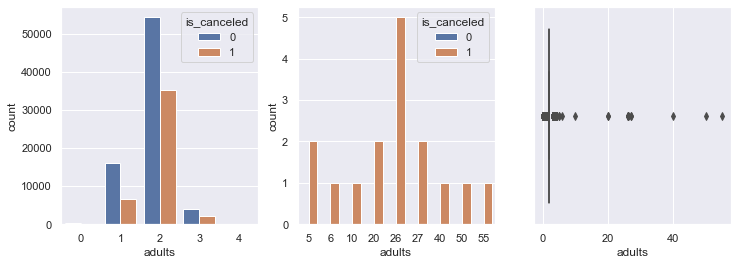

In [29]:
summary_table('adults')
print(dane['adults'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(data=dane, x=dane[dane.adults<=4].adults,hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x=dane[dane.adults>4].adults,hue=dane['is_canceled'].astype(str), ax=ax[1])
sns.boxplot(data=dane, x='adults', ax=ax[2])

In [30]:
l_adults = dane.loc[dane['adults']>2]

0    0.652167
1    0.347833
Name: is_canceled, dtype: float64


<AxesSubplot:ylabel='is_canceled'>

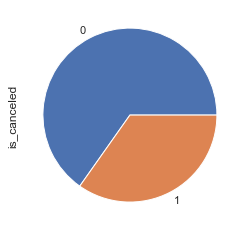

In [31]:
print(l_adults.is_canceled.value_counts(normalize = True))
l_adults.is_canceled.value_counts(normalize = True).plot.pie()

# Variable 'children'

Number of children <br/>
The number of chuldren does not significantly affect cancellations

      All reservations  Cancelled  Not cancelled  Percentage of cancelled
0.0             110323      41031        69292.0                37.191701
1.0               4852       1567         3285.0                32.295960
2.0               3650       1541         2109.0                42.219178
3.0                 76         17           59.0                22.368421
10.0                 1          1            0.0               100.000000
count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64


<AxesSubplot:xlabel='children', ylabel='Count'>

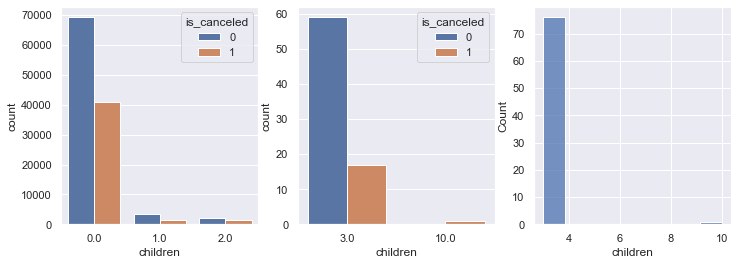

In [32]:
summary_table('children')
print(hotel_booking['children'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(data=dane, x=dane[dane.children<=2].children,hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x=dane[dane.children>2].children,hue=dane['is_canceled'].astype(str), ax=ax[1])
sns.histplot(data=dane, x=dane[dane.children>hotel_booking.children.quantile(0.99)].children, ax=ax[2])

# Variable 'babies'

Number of babies <br/>
More people without babies, does not significantly affect cancellations

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
0             117988    43990.0          73998                37.283453
1                898      165.0            733                18.374165
2                 14        2.0             12                14.285714
9                  1        0.0              1                 0.000000
10                 1        0.0              1                 0.000000
count    119390.000000
mean          0.007949
std           0.097436
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: babies, dtype: float64


<AxesSubplot:xlabel='babies', ylabel='Count'>

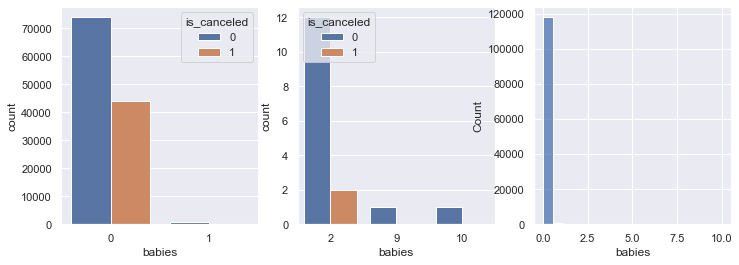

In [33]:
summary_table('babies')
print(hotel_booking['babies'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(data=dane, x=dane[dane.babies<2].babies, hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x=dane[dane.babies>=2].babies,hue=dane['is_canceled'].astype(str), ax=ax[1])
sns.histplot(data=dane, x='babies', ax=ax[2])

# Variable 'meal'

Meal Plan Type<br/>
Undefined/SC – No meal package <br/>
BB – breakfast <br/>
HB – half board (breakfast + one meal, usually dinner) <br/>
FB – full board (breakfast, lunch and dinner) <br/>
Most bookings include only breakfast, FB is canceled most often, while undefined is canceled least often

           All reservations  Cancelled  Not cancelled  Percentage of cancelled
BB                    91867      34456          57411                37.506395
FB                      798        478            320                59.899749
HB                    14434       4981           9453                34.508799
SC                    10638       3956           6682                37.187441
Undefined              1165        286            879                24.549356
count     118902
unique         5
top           BB
freq       91867
Name: meal, dtype: object


<AxesSubplot:xlabel='meal', ylabel='Count'>

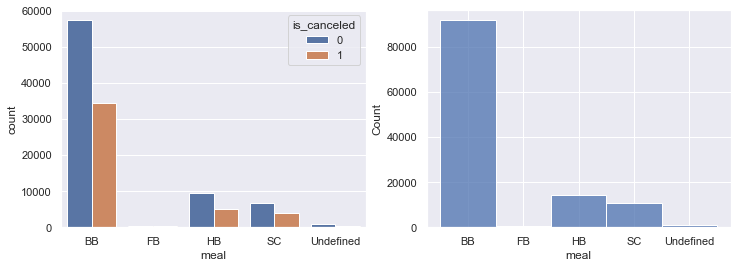

In [34]:
summary_table('meal')
print(dane['meal'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='meal', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x='meal', ax=ax[1])

In [35]:
dane['full_meal'] = dane['meal'].apply(lambda x: 1 if x == 'FB' else 0)

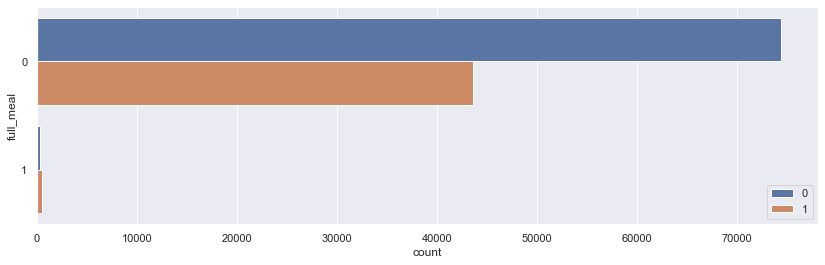

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
sns.countplot(data=dane, y='full_meal', hue=dane['is_canceled'].astype(str))
plt.legend(loc='lower right')

In [37]:
dane['only_breakfast'] = dane['meal'].apply(lambda x: 1 if x == 'BB' else 0)

<AxesSubplot:xlabel='only_breakfast', ylabel='count'>

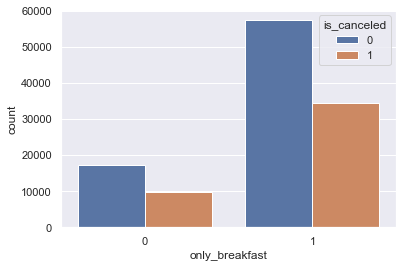

In [38]:
sns.countplot(data=dane, x='only_breakfast', hue=dane['is_canceled'].astype(str))

# Variable 'country'

Country of Origin <br/>
Majority from Portugal (PRT) <br/>
Reservations from 177 different countries

In [39]:
summary_table('country')
print(dane['country'].describe())

     All reservations  Cancelled  Not cancelled  Percentage of cancelled
ABW                 2        0.0            2.0                 0.000000
AGO               362      205.0          157.0                56.629834
AIA                 1        0.0            1.0                 0.000000
ALB                12        2.0           10.0                16.666667
AND                 7        5.0            2.0                71.428571
..                ...        ...            ...                      ...
VGB                 1        1.0            0.0               100.000000
VNM                 8        2.0            6.0                25.000000
ZAF                80       31.0           49.0                38.750000
ZMB                 2        1.0            1.0                50.000000
ZWE                 4        2.0            2.0                50.000000

[177 rows x 4 columns]
count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object


In [40]:
canc = pd.DataFrame({'country': dane['country'].value_counts(), 'percent':(dane['country'].loc[dane.is_canceled==1].value_counts()*100)/dane['country'].value_counts()})
canc = canc.fillna(0)

In [41]:
canc['percent'] = pd.cut(canc['percent'],5, labels=['0cot','1cot','2cot','3cot','4cot'])

In [42]:
canc['percent'].value_counts()

0cot    72
1cot    56
2cot    19
4cot    16
3cot    14
Name: percent, dtype: int64

In [43]:
canc

,country,percent
ABW,2,0cot
AGO,362,2cot
AIA,1,0cot
ALB,12,0cot
AND,7,3cot
...,...,...
VGB,1,4cot
VNM,8,1cot
ZAF,80,1cot
ZMB,2,2cot


In [44]:
canc = canc.drop('country', axis=1)

In [45]:
canc = canc.reset_index()

In [46]:
canc = canc.rename(columns={'index':'country','percent':'country_cat'})

In [47]:
dane = pd.merge(dane, canc, on = 'country', how='left')

      All reservations  Cancelled  Not cancelled  Percentage of cancelled
0cot             23782       4186          19596                17.601547
1cot             43935      11123          32812                25.316945
2cot             50775      28541          22234                56.210734
3cot               278        188             90                67.625899
4cot               132        119             13                90.151515
count     118902
unique         5
top         2cot
freq       50775
Name: country_cat, dtype: object


<AxesSubplot:xlabel='country_cat', ylabel='count'>

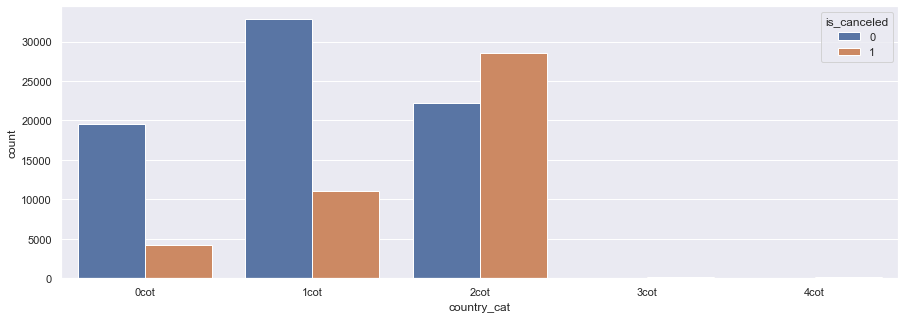

In [48]:
summary_table('country_cat')
print(dane['country_cat'].describe())
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data=dane, x='country_cat', hue=dane['is_canceled'].astype(str))

# Variable 'market_segment

Market segment, „TA” means Travel Agencies, „TO” means Tour Operators<br/>
Aviation<br/> 
Complementary <br/>
Corporate<br/> 
Direct<br/> 
Groups<br/>
Offline TA/TO <br/>
Online TA <br/>
Undefined <br/>

Most reservations come from online sources, group reservations are more likely to be canceled than honored

               All reservations  Cancelled  Not cancelled  \
Aviation                    237         52          185.0   
Complementary               734         90          644.0   
Corporate                  5111        978         4133.0   
Direct                    12449       1921        10528.0   
Groups                    19806      12097         7709.0   
Offline TA/TO             24160       8278        15882.0   
Online TA                 56403      20739        35664.0   
Undefined                     2          2            0.0   

               Percentage of cancelled  
Aviation                     21.940928  
Complementary                12.261580  
Corporate                    19.135199  
Direct                       15.430958  
Groups                       61.077451  
Offline TA/TO                34.263245  
Online TA                    36.769321  
Undefined                   100.000000  
count        118902
unique            8
top       Online TA
freq          56403
N

[Text(0, 0, 'Direct'),
 Text(1, 0, 'Corporate'),
 Text(2, 0, 'Online TA'),
 Text(3, 0, 'Offline TA/TO'),
 Text(4, 0, 'Complementary'),
 Text(5, 0, 'Groups'),
 Text(6, 0, 'Undefined'),
 Text(7, 0, 'Aviation')]

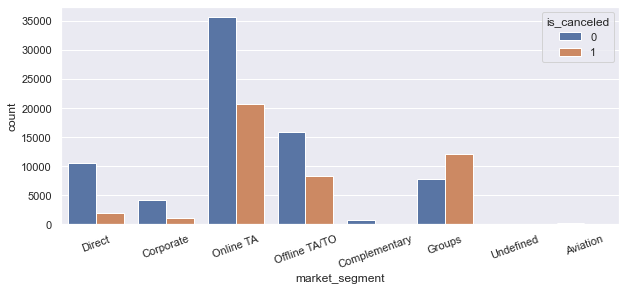

In [49]:
summary_table('market_segment')
print(dane['market_segment'].describe())
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax2 = sns.countplot(data=dane, x='market_segment', hue=dane['is_canceled'].astype(str))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=20)

In [50]:
dane['group'] = dane['market_segment'].apply(lambda x: 1 if x == 'Groups' else 0)

<AxesSubplot:xlabel='group', ylabel='count'>

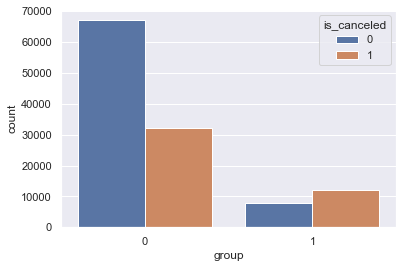

In [51]:
sns.countplot(data=dane, x='group', hue=dane['is_canceled'].astype(str))

# Variable 'distribution_channel'

Distribution channel. „TA” means „Travel Agencies”, „TO” means „Tour Operators”

           All reservations  Cancelled  Not cancelled  Percentage of cancelled
TA/TO                 97730      40119          57611                41.050854
Direct                14483       2543          11940                17.558517
Corporate              6491       1454           5037                22.400246
GDS                     193         37            156                19.170984
Undefined                 5          4              1                80.000000
count     118902
unique         5
top        TA/TO
freq       97730
Name: distribution_channel, dtype: object


<AxesSubplot:xlabel='distribution_channel', ylabel='Count'>

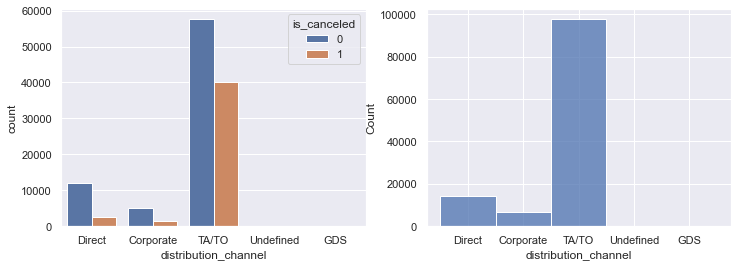

In [52]:
summary_table('distribution_channel')
print(dane['distribution_channel'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='distribution_channel', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x='distribution_channel', ax=ax[1])

# Variable 'is_repeated_guest'

1 if the guest has returned, 0 if not <br/>
Returning guests are less likely to cancel

   All reservations  Cancelled  Not cancelled  Percentage of cancelled
0            115096      43605          71491                37.885765
1              3806        552           3254                14.503416
count    118902.000000
mean          0.032010
std           0.176026
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_repeated_guest, dtype: float64


<AxesSubplot:xlabel='is_repeated_guest', ylabel='Count'>

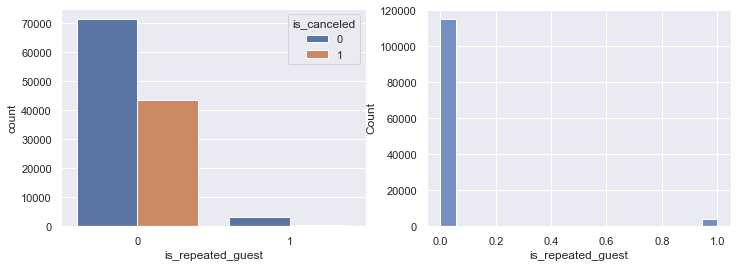

In [53]:
summary_table('is_repeated_guest')
print(dane['is_repeated_guest'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='is_repeated_guest', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x='is_repeated_guest', ax=ax[1])

# Variable 'previous_cancellations'

Number of previous reserwation, which was canceled <br/>
The more previous cancellations a customer has, the higher the chance of another cancellation

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
0             112455      38239        74216.0                34.003824
1               6017       5691          326.0                94.582018
2                113         37           76.0                32.743363
3                 65         20           45.0                30.769231
4                 31          7           24.0                22.580645
5                 19          2           17.0                10.526316
6                 22          7           15.0                31.818182
11                35         10           25.0                28.571429
13                12         11            1.0                91.666667
14                14         14            0.0               100.000000
19                19         19            0.0               100.000000
21                 1          1            0.0               100.000000
24                48         48            0.0               100

<AxesSubplot:xlabel='previous_cancellations', ylabel='count'>

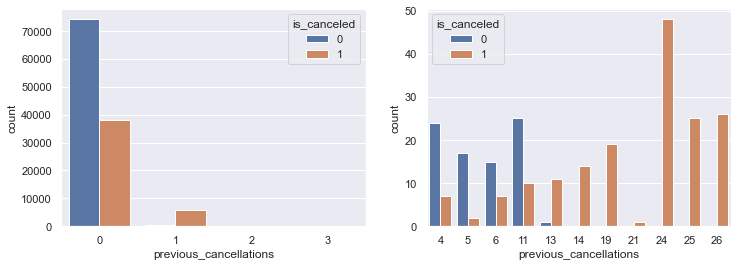

In [54]:
summary_table('previous_cancellations')
print(dane['previous_cancellations'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x=dane[dane.previous_cancellations<=3].previous_cancellations,hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x=dane[dane.previous_cancellations>3].previous_cancellations,hue=dane['is_canceled'].astype(str), ax=ax[1])

# Variable 'previous_bookings_not_canceled'

Previous Non-Canceled Reservations<br/>
Most customers are new<br/>
More past successful bookings decrease cancellation probability

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
0             115505    43970.0          71535                38.067616
1               1452       75.0           1377                 5.165289
2                536       29.0            507                 5.410448
3                301       14.0            287                 4.651163
4                209       10.0            199                 4.784689
..               ...        ...            ...                      ...
68                 1        0.0              1                 0.000000
69                 1        0.0              1                 0.000000
70                 1        0.0              1                 0.000000
71                 1        0.0              1                 0.000000
72                 1        0.0              1                 0.000000

[73 rows x 4 columns]
count    118902.000000
mean          0.131629
std           1.484647
min           0.000000
25%           0.00000

<AxesSubplot:xlabel='previous_bookings_not_canceled', ylabel='Count'>

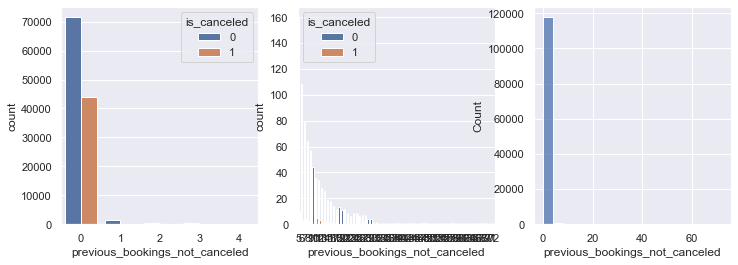

In [55]:
summary_table('previous_bookings_not_canceled')
print(dane['previous_bookings_not_canceled'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(data=dane, x=dane[dane.previous_bookings_not_canceled<5].previous_bookings_not_canceled,hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x=dane[dane.previous_bookings_not_canceled>=5].previous_bookings_not_canceled,hue=dane['is_canceled'].astype(str), ax=ax[1])
sns.histplot(data=dane, x='previous_bookings_not_canceled', ax=ax[2])

# Variable 'reserved_room_type'

Reserved Room Type.<br/>
Most bookings are from room A, room type does not significantly impact cancellations

   All reservations  Cancelled  Not cancelled  Percentage of cancelled
A             85601      33579        52022.0                39.227345
B              1118        368          750.0                32.915921
C               931        308          623.0                33.082707
D             19173       6101        13072.0                31.820790
E              6497       1909         4588.0                29.382792
F              2890        880         2010.0                30.449827
G              2083        763         1320.0                36.629861
H               601        245          356.0                40.765391
L                 6          2            4.0                33.333333
P                 2          2            0.0               100.000000
count     118902
unique        10
top            A
freq       85601
Name: reserved_room_type, dtype: object


<AxesSubplot:xlabel='reserved_room_type', ylabel='Count'>

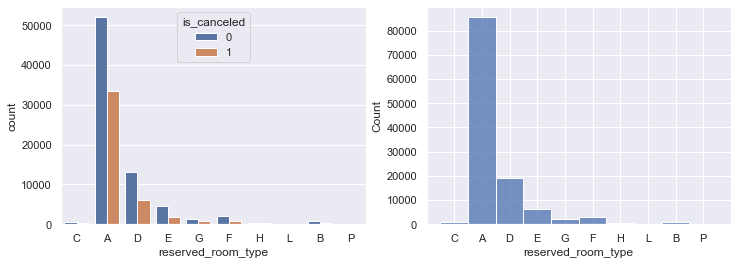

In [56]:
summary_table('reserved_room_type')
print(dane['reserved_room_type'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='reserved_room_type', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x='reserved_room_type', ax=ax[1])

# Variable 'assigned_room_type'

Assigned room type<br/>
Most bookings are from room A, room type doesn not significantly impact cancellations

   All reservations  Cancelled  Not cancelled  Percentage of cancelled
A             73863      32905        40958.0                44.548691
B              2163        512         1651.0                23.670828
C              2354        444         1910.0                18.861512
D             25166       6357        18809.0                25.260272
E              7738       1962         5776.0                25.355389
F              3732        926         2806.0                24.812433
G              2539        780         1759.0                30.720756
H               708        251          457.0                35.451977
I               357          5          352.0                 1.400560
K               279         12          267.0                 4.301075
L                 1          1            0.0               100.000000
P                 2          2            0.0               100.000000
count     118902
unique        12
top            A
freq       73863
Name: ass

<AxesSubplot:xlabel='assigned_room_type', ylabel='Count'>

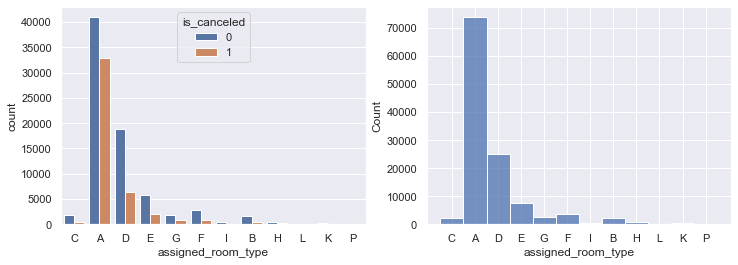

In [57]:
summary_table('assigned_room_type')
print(dane['assigned_room_type'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='assigned_room_type', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x='assigned_room_type', ax=ax[1])

# Variable 'booking_changes'

Number of changes to reservation<br/>
Most customers do not modify their reservation, more changes correlate with a lower probability of cancellation

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
0             100906    41331.0          59575                40.959903
1              12639     1801.0          10838                14.249545
2               3790      765.0           3025                20.184697
3                925      144.0            781                15.567568
4                375       67.0            308                17.866667
5                118       20.0             98                16.949153
6                 63       18.0             45                28.571429
7                 31        3.0             28                 9.677419
8                 17        4.0             13                23.529412
9                  8        1.0              7                12.500000
10                 6        1.0              5                16.666667
11                 2        0.0              2                 0.000000
12                 2        0.0              2                 0

<AxesSubplot:xlabel='booking_changes', ylabel='count'>

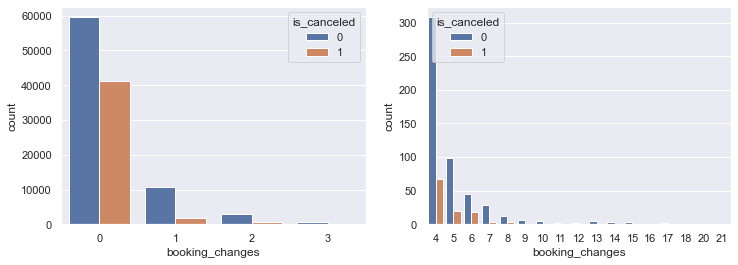

In [58]:
summary_table('booking_changes')
print(dane['booking_changes'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x=dane[dane.booking_changes<=3].booking_changes,hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x=dane[dane.booking_changes>3].booking_changes,hue=dane['is_canceled'].astype(str), ax=ax[1])

# variable 'deposit_type'

No deposit – No upfront payment<br/>
Non Refund – Full prepayment<br/>
Refundable – Partial deposit paid <br/>
Fully paid reservations are significantly less likely to be canceled

            All reservations  Cancelled  Not cancelled  \
No Deposit            104167      29641          74526   
Non Refund             14573      14480             93   
Refundable               162         36            126   

            Percentage of cancelled  
No Deposit                28.455269  
Non Refund                99.361834  
Refundable                22.222222  
count         118902
unique             3
top       No Deposit
freq          104167
Name: deposit_type, dtype: object


<AxesSubplot:xlabel='deposit_type', ylabel='Count'>

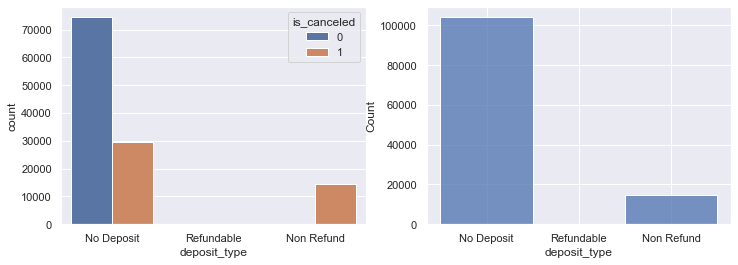

In [59]:
summary_table('deposit_type')
print(dane['deposit_type'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='deposit_type', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x='deposit_type', ax=ax[1])

In [60]:
dane['no_deposit'] = dane['deposit_type'].apply(lambda x: 1 if x == 'No Deposit' else 0)

<AxesSubplot:xlabel='no_deposit', ylabel='count'>

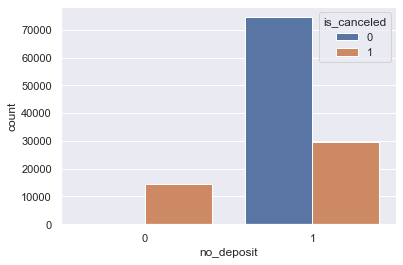

In [61]:
sns.countplot(data=dane, x='no_deposit', hue=dane['is_canceled'].astype(str))

# Variable 'agent'

Travel agency ID <br/>
333 different agencies

In [62]:
summary_table('agent')
print(dane['agent'].describe())

       All reservations  Cancelled  Not cancelled  Percentage of cancelled
0.0               16006     3994.0        12012.0                24.953143
1.0                7191     5280.0         1911.0                73.425115
2.0                 162       34.0          128.0                20.987654
3.0                1336      771.0          565.0                57.709581
4.0                  47       31.0           16.0                65.957447
...                 ...        ...            ...                      ...
510.0                 2        0.0            2.0                 0.000000
526.0                10        1.0            9.0                10.000000
527.0                35        0.0           35.0                 0.000000
531.0                68       46.0           22.0                67.647059
535.0                 3        0.0            3.0                 0.000000

[333 rows x 4 columns]
count    118902.000000
mean         74.893938
std         107.144715
min    

# Variable 'company'

Booking Agent ID <br/>
350 different booking agents

In [63]:
summary_table('company')
print(dane['company'].describe())

       All reservations  Cancelled  Not cancelled  Percentage of cancelled
0.0              112279    42989.0        69290.0                38.287658
6.0                   1        0.0            1.0                 0.000000
8.0                   1        0.0            1.0                 0.000000
9.0                  27        3.0           24.0                11.111111
10.0                  1        0.0            1.0                 0.000000
...                 ...        ...            ...                      ...
531.0                 1        1.0            0.0               100.000000
534.0                 2        0.0            2.0                 0.000000
539.0                 2        0.0            2.0                 0.000000
541.0                 1        0.0            1.0                 0.000000
543.0                 2        2.0            0.0               100.000000

[350 rows x 4 columns]
count    118902.000000
mean         10.562354
std          53.512305
min    

# Variable 'days_in_waiting_list'

Days between booking and confirmation <br/>
The longer the confirmation delay, the higher the cancellation probability

     All reservations  Cancelled  Not cancelled  Percentage of cancelled
0              115204    41798.0        73406.0                36.281726
1                  12        3.0            9.0                25.000000
2                   5        1.0            4.0                20.000000
3                  59       59.0            0.0               100.000000
4                  25        8.0           17.0                32.000000
..                ...        ...            ...                      ...
236                35        6.0           29.0                17.142857
259                10        0.0           10.0                 0.000000
330                15        1.0           14.0                 6.666667
379                15        9.0            6.0                60.000000
391                45       45.0            0.0               100.000000

[128 rows x 4 columns]
count    118902.000000
mean          2.330676
std          17.630161
min           0.000000
25%     

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10')]

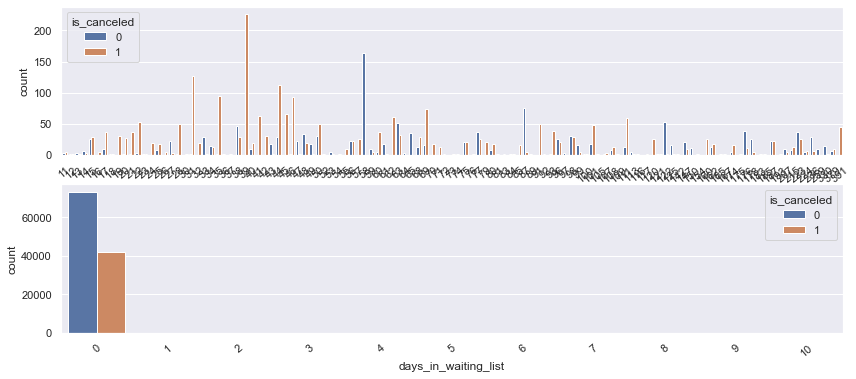

In [64]:
summary_table('days_in_waiting_list')
print(dane['days_in_waiting_list'].describe())
fig, ax = plt.subplots(2, 1, figsize=(14, 6))
ax2 = sns.countplot(data=dane, x=dane[dane.days_in_waiting_list>10].days_in_waiting_list,hue=dane['is_canceled'].astype(str), ax=ax[0])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40)
ax3 = sns.countplot(data=dane, x=dane[dane.days_in_waiting_list<=10].days_in_waiting_list,hue=dane['is_canceled'].astype(str), ax=ax[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40)

# variable 'customer_type'

Reservation type<br/>
Contract <br/>
Group<br/>
Transient - independent booking, not part of a group or contract <br/>
Transient-party – Independent booking linked to at least one other transient booking

                 All reservations  Cancelled  Not cancelled  \
Transient                   89174      36460          52714   
Transient-Party             25082       6377          18705   
Contract                     4076       1262           2814   
Group                         570         58            512   

                 Percentage of cancelled  
Transient                      40.886357  
Transient-Party                25.424607  
Contract                       30.961727  
Group                          10.175439  
count        118902
unique            4
top       Transient
freq          89174
Name: customer_type, dtype: object


<AxesSubplot:xlabel='customer_type', ylabel='Count'>

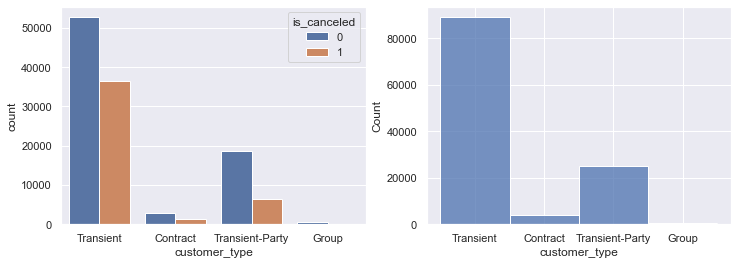

In [65]:
summary_table('customer_type')
print(dane['customer_type'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='customer_type', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x='customer_type', ax=ax[1])

# Variable 'adr'

Average daily rate <br/>


          All reservations  Cancelled  Not cancelled  Percentage of cancelled
-6.38                    1        0.0            1.0                 0.000000
 0.00                 1938      203.0         1735.0                10.474716
 0.26                    1        0.0            1.0                 0.000000
 0.50                    1        1.0            0.0               100.000000
 1.00                   15        3.0           12.0                20.000000
...                    ...        ...            ...                      ...
 450.00                  1        1.0            0.0               100.000000
 451.50                  1        0.0            1.0                 0.000000
 508.00                  1        0.0            1.0                 0.000000
 510.00                  1        0.0            1.0                 0.000000
 5400.00                 1        1.0            0.0               100.000000

[8870 rows x 4 columns]
count    118902.000000
mean        102.

<AxesSubplot:xlabel='adr', ylabel='Count'>

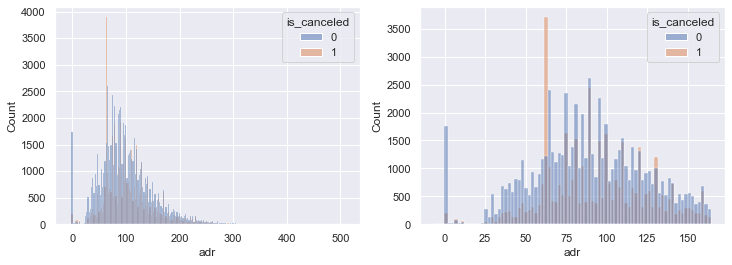

In [66]:
summary_table('adr')
print(dane['adr'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=dane, x=dane[dane.adr<5000].adr,hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x=dane[dane.adr<dane.adr.quantile(0.90)].adr,hue=dane['is_canceled'].astype(str), ax=ax[1])

# Variable 'required_car_parking_spaces'

Number of reserved parking spaces<br/>
Parking does not significantly affect cancellation probability

   All reservations  Cancelled  Not cancelled  Percentage of cancelled
0            111592    44157.0          67435                39.570041
1              7277        0.0           7277                 0.000000
2                28        0.0             28                 0.000000
3                 3        0.0              3                 0.000000
8                 2        0.0              2                 0.000000
count    118902.000000
mean          0.061883
std           0.244168
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: required_car_parking_spaces, dtype: float64


<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='count'>

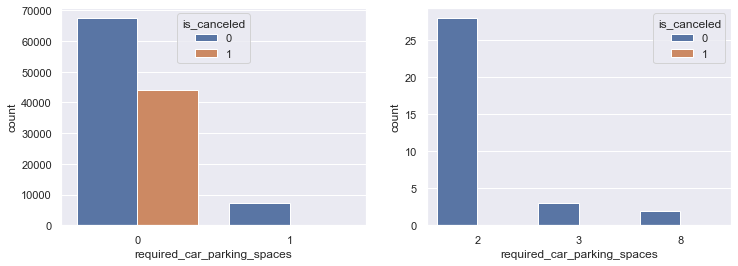

In [67]:
summary_table('required_car_parking_spaces')
print(dane['required_car_parking_spaces'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x=dane[dane.required_car_parking_spaces<2].required_car_parking_spaces, hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x=dane[dane.required_car_parking_spaces>=2].required_car_parking_spaces,hue=dane['is_canceled'].astype(str), ax=ax[1])

# Variable 'total_of_special_requests'

Reservation with at least one special request are less likely to be canceled<br/>

   All reservations  Cancelled  Not cancelled  Percentage of cancelled
0             69991      33501          36490                47.864725
1             33124       7315          25809                22.083686
2             12923       2860          10063                22.131084
3              2487        444           2043                17.852835
4               339         36            303                10.619469
5                38          1             37                 2.631579
count    118902.000000
mean          0.571706
std           0.792678
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: total_of_special_requests, dtype: float64


<AxesSubplot:xlabel='total_of_special_requests'>

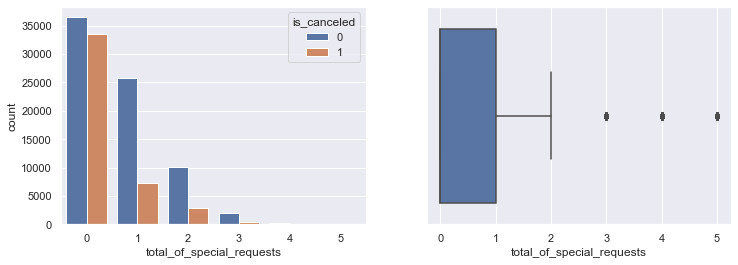

In [68]:
summary_table('total_of_special_requests')
print(dane['total_of_special_requests'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='total_of_special_requests', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.boxplot(data=dane, x='total_of_special_requests', ax=ax[1])

# Variable 'guests'

In [69]:
dane['guests']=dane['adults']+dane['babies']+dane['children']

      All reservations  Cancelled  Not cancelled  Percentage of cancelled
0.0                170         15          155.0                 8.823529
1.0              22289       6540        15749.0                29.341828
2.0              81883      32530        49353.0                39.727416
3.0              10480       3377         7103.0                32.223282
4.0               3926       1646         2280.0                41.925624
5.0                137         34          103.0                24.817518
6.0                  1          1            0.0               100.000000
10.0                 2          1            1.0                50.000000
12.0                 2          1            1.0                50.000000
20.0                 2          2            0.0               100.000000
26.0                 5          5            0.0               100.000000
27.0                 2          2            0.0               100.000000
40.0                 1          1     

<AxesSubplot:xlabel='guests', ylabel='Count'>

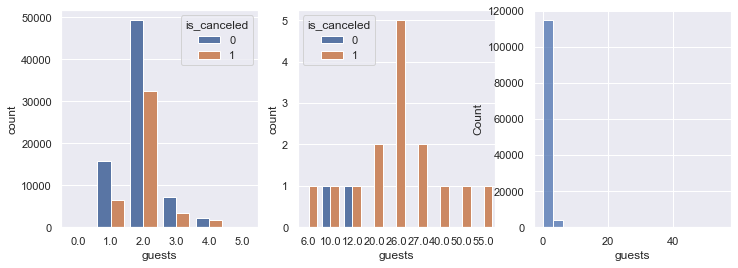

In [70]:
summary_table('guests')
print(dane['guests'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(data=dane, x=dane[dane.guests<6].guests,hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.countplot(data=dane, x=dane[dane.guests>=6].guests,hue=dane['is_canceled'].astype(str), ax=ax[1])
sns.histplot(data=dane, x='guests', ax=ax[2])

In [71]:
d = dane[dane.guests>dane.guests.quantile(0.95)]
m = dane[dane.guests>dane.guests.quantile(0.05)]

In [72]:
dane.guests.quantile(0.05)

1.0

0    0.584559
1    0.415441
Name: is_canceled, dtype: float64


<AxesSubplot:ylabel='is_canceled'>

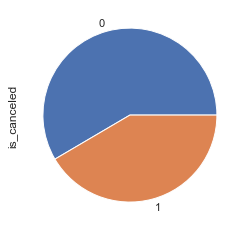

In [73]:
print(d.is_canceled.value_counts(normalize = True))
d.is_canceled.value_counts(normalize = True).plot.pie()

0    0.610112
1    0.389888
Name: is_canceled, dtype: float64


<AxesSubplot:ylabel='is_canceled'>

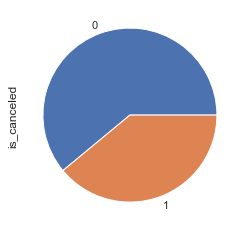

In [74]:
print(m.is_canceled.value_counts(normalize = True))
m.is_canceled.value_counts(normalize = True).plot.pie()

# Variable 'total_nights'

In [75]:
dane['total_nights']=dane['stays_in_weekend_nights']+dane['stays_in_week_nights']

    All reservations  Cancelled  Not cancelled  Percentage of cancelled
0                701       26.0          675.0                 3.708987
1              20797     5259.0        15538.0                25.287301
2              27531    12157.0        15374.0                44.157495
3              27025    11335.0        15690.0                41.942646
4              17363     6357.0        11006.0                36.612337
5               7765     2655.0         5110.0                34.191887
6               3850     1535.0         2315.0                39.870130
7               8634     2956.0         5678.0                34.236738
8               1157      441.0          716.0                38.115817
9                838      313.0          525.0                37.350835
10              1135      356.0          779.0                31.365639
11               395      119.0          276.0                30.126582
12               223       98.0          125.0                43

<AxesSubplot:xlabel='total_nights'>

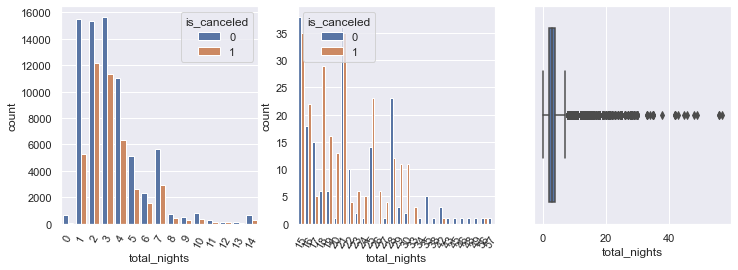

In [76]:
summary_table('total_nights')
print(dane['total_nights'].describe())
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax2 = sns.countplot(data=dane, x=dane[dane.total_nights<15].total_nights,hue=dane['is_canceled'].astype(str), ax=ax[0])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
ax3 = sns.countplot(data=dane, x=dane[dane.total_nights>=15].total_nights,hue=dane['is_canceled'].astype(str), ax=ax[1])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60)
sns.boxplot(data=dane, x='total_nights', ax=ax[2])

In [77]:
d = dane[dane.total_nights>dane.total_nights.quantile(0.95)]
m = dane[dane.total_nights>dane.total_nights.quantile(0.05)]

0    0.64152
1    0.35848
Name: is_canceled, dtype: float64


<AxesSubplot:ylabel='is_canceled'>

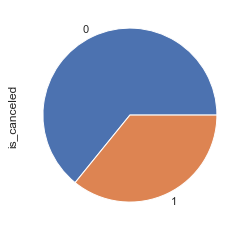

In [78]:
print(d.is_canceled.value_counts(normalize = True))
d.is_canceled.value_counts(normalize = True).plot.pie()

0    0.60092
1    0.39908
Name: is_canceled, dtype: float64


<AxesSubplot:ylabel='is_canceled'>

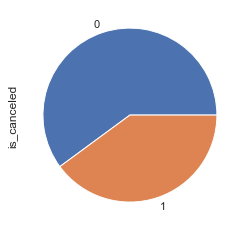

In [79]:
print(m.is_canceled.value_counts(normalize = True))
m.is_canceled.value_counts(normalize = True).plot.pie()

# Variable 'room'

In [80]:
dane['room'] = dane['assigned_room_type'] == dane['reserved_room_type']

In [81]:
dane['room'] = dane['room'].replace([False, True], [0,1])

In [82]:
dane['room'].value_counts()

1    104203
0     14699
Name: room, dtype: int64

   All reservations  Cancelled  Not cancelled  Percentage of cancelled
1            104203      43364          60839                41.614925
0             14699        793          13906                 5.394925
count    118902.000000
mean          0.876377
std           0.329152
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: room, dtype: float64


<AxesSubplot:xlabel='room', ylabel='Count'>

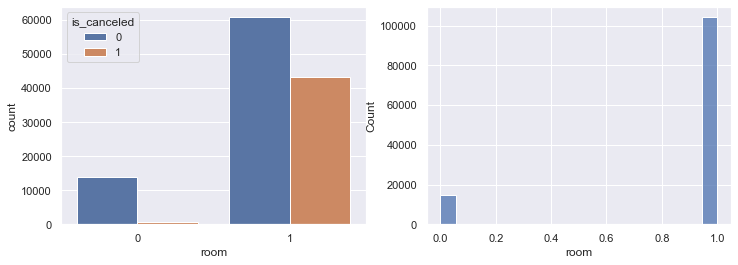

In [83]:
summary_table('room')
print(dane['room'].describe())
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=dane, x='room', hue=dane['is_canceled'].astype(str), ax=ax[0])
sns.histplot(data=dane, x='room', ax=ax[1])

# Correlation & Insights
* Weak Correlation Between Variables
* Moderate Correlation (0.65) between 'agent' and 'hotel', suggesting some agencies consistently book certain hotels.
* Date of arrival does not add much value to the analysis and can be excluded.
* About 1/3 of reservations are canceled.
* Time between booking and stay strongly influences cancellation probability, making outliers in this variable significant.
* Longer stays are more likely to be canceled, but most bookings are short-term.
* Each canceled reservation increases the likelihood of another cancellation.
* Longer confirmation time increases cancellation risk.
* The assigned room type does not significantly impact cancellations.
* More guests in a booking increase the probability of cancellation.

In [84]:
dane.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,full_meal,only_breakfast,country_cat,group,no_deposit,guests,total_nights,room
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Check-Out,2015-07-01,0,1,2cot,0,1,2.0,0,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Check-Out,2015-07-01,0,1,2cot,0,1,2.0,0,1
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Check-Out,2015-07-02,0,1,1cot,0,1,1.0,1,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Check-Out,2015-07-02,0,1,1cot,0,1,1.0,1,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Check-Out,2015-07-03,0,1,1cot,0,1,2.0,2,1
5,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Check-Out,2015-07-03,0,1,1cot,0,1,2.0,2,1
6,Resort Hotel,0,0,2015,7,27,1,0,2,2,...,Check-Out,2015-07-03,0,1,2cot,0,1,2.0,2,1
7,Resort Hotel,0,9,2015,7,27,1,0,2,2,...,Check-Out,2015-07-03,1,0,2cot,0,1,2.0,2,1
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,Canceled,2015-05-06,0,1,2cot,0,1,2.0,3,1
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,Canceled,2015-04-22,0,0,2cot,0,1,2.0,3,1


In [85]:
dane = dane.reset_index(drop=True)

In [86]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           118902 non-null  object  
 1   is_canceled                     118902 non-null  int64   
 2   lead_time                       118902 non-null  int64   
 3   arrival_date_year               118902 non-null  int64   
 4   arrival_date_month              118902 non-null  int64   
 5   arrival_date_week_number        118902 non-null  int64   
 6   arrival_date_day_of_month       118902 non-null  int64   
 7   stays_in_weekend_nights         118902 non-null  int64   
 8   stays_in_week_nights            118902 non-null  int64   
 9   adults                          118902 non-null  int64   
 10  children                        118902 non-null  float64 
 11  babies                          118902 non-null  int64   
 12  me

In [87]:
dane.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [88]:
dane.shape

(118902, 40)

In [89]:
dane['if_resort_hotel'] = dane['hotel'].replace(['City Hotel', 'Resort Hotel'], [0,1])

In [90]:
dane['lead_time'] = dane['lead_time'].apply(lambda x: 364 if x > 363 else x)

In [91]:
dane['previous_cancellations'] = dane['previous_cancellations'].apply(lambda x: 14 if x > 14 else x)

In [92]:
dane['previous_bookings_not_canceled'] = dane['previous_bookings_not_canceled'].apply(lambda x: 50 if x > 50 else x)

In [93]:
dane['booking_changes'] = dane['booking_changes'].apply(lambda x: 10 if x >=10 else x)

In [94]:
dane = dane[dane['adr'] > 0]

In [95]:
dane = dane[dane['adr']<5000]

In [96]:
dane['required_car_parking_spaces'] = dane['required_car_parking_spaces'].apply(lambda x: 1 if x > 1 else x)

In [97]:
dane['guests'] = dane['guests'].apply(lambda x: 12 if x > 12 else x)

In [98]:
dane = dane[dane['guests']!=0]

In [99]:
dane['total_nights'] = dane['total_nights'].apply(lambda x: 31 if x > 31 else x)

In [100]:
dane = dane[dane['total_nights']!=0]

In [101]:
dane = dane.reset_index(drop=True)

In [102]:
dane.shape

(116931, 41)

# Linear regression

In [103]:
X_reg = dane[['guests','total_of_special_requests','required_car_parking_spaces']]

In [104]:
y_reg = dane['adr']

In [105]:
from sklearn.model_selection import train_test_split

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_reg_train,y_reg_train)

LinearRegression()

Vector

In [107]:
print("Vector:", lin_reg.intercept_)

Vector: 41.34459716886228


In [108]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_reg.columns, columns=['Coefficients'])
coeff_df

,Coefficients
guests,29.285812
total_of_special_requests,6.916396
required_car_parking_spaces,6.320828


In [109]:
y_predict = lin_reg.predict(X_reg_test)

In [110]:
df_reg = pd.DataFrame({'Current': y_reg_test, 'Prediction': y_predict, 'Difference': y_predict-y_reg_test})
df_reg

,Current,Prediction,Difference
89550,100.0,99.916221,-0.083779
40146,94.5,99.916221,5.416221
73232,62.8,99.916221,37.116221
13391,340.0,158.487846,-181.512154
96697,85.0,106.832617,21.832617
...,...,...,...
47297,107.0,106.832617,-0.167383
48441,101.0,99.916221,-1.083779
95754,95.0,99.916221,4.916221
114271,95.5,70.630409,-24.869591


In [111]:
from sklearn import metrics

print('Mean squared error (MSE):', metrics.mean_squared_error(y_reg_test, y_predict))
print('Standard error of estimate:', np.sqrt(metrics.mean_squared_error(y_reg_test, y_predict)))

Mean squared error (MSE): 1761.5207310325316
Standard error of estimate: 41.97047451521762


In [112]:
print('Coefficient r2',metrics.r2_score(y_reg_test, y_predict))

Coefficient r2 0.2060240816762261


# Statistical tests

In [113]:
from scipy import stats

In [114]:
a1 = dane['total_nights'].loc[dane['is_canceled']==1]
a0 = dane['total_nights'].loc[dane['is_canceled']==0]

In [115]:
num = dane[['lead_time', 'stays_in_week_nights', 'adults', 'children',
            'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 'adr',
            'required_car_parking_spaces', 'total_of_special_requests']]

In [116]:
tt = []
pp = []
for column in num:
    a1 = dane[column].loc[dane['is_canceled']==1]
    a0 = dane[column].loc[dane['is_canceled']==0]
    t, p = stats.ttest_ind(a1,a0)
    tt.append(round(t,5))
    pp.append(round(p,5))

ttesty = pd.DataFrame({'variables': num.columns, 't':np.round(tt,2), 'p':np.round(pp,2)})
print(ttesty)

                         variables       t     p
0                        lead_time  104.13  0.00
1             stays_in_week_nights    6.21  0.00
2                           adults   18.46  0.00
3                         children    1.38  0.17
4                           babies  -11.12  0.00
5           previous_cancellations   47.89  0.00
6   previous_bookings_not_canceled  -18.94  0.00
7                  booking_changes  -50.88  0.00
8             days_in_waiting_list   18.46  0.00
9                              adr    9.89  0.00
10     required_car_parking_spaces  -69.36  0.00
11       total_of_special_requests  -83.90  0.00


In [117]:
tt2 = []
pp2 = []

for column in num:
    t, p = stats.shapiro(dane[column])
    tt2.append(round(t,5))
    pp2.append(round(p,5))
    
shapirotest = pd.DataFrame({'variables': num.columns, 't':np.round(tt2,2), 'p':np.round(pp2,2)})
print(shapirotest)

                         variables     t    p
0                        lead_time  0.87  0.0
1             stays_in_week_nights  0.81  0.0
2                           adults  0.65  0.0
3                         children  0.28  0.0
4                           babies  0.05  0.0
5           previous_cancellations  0.10  0.0
6   previous_bookings_not_canceled  0.06  0.0
7                  booking_changes  0.39  0.0
8             days_in_waiting_list  0.12  0.0
9                              adr  0.93  0.0
10     required_car_parking_spaces  0.26  0.0
11       total_of_special_requests  0.72  0.0


No distribution is normal <br/>
the means differ

# Machine learning models

In [118]:
cat_country = pd.DataFrame(pd.get_dummies(dane['country_cat']))
cat_country.head()

,0cot,1cot,2cot,3cot,4cot
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [119]:
X_1 = dane[['if_resort_hotel','lead_time','total_nights','guests', 'previous_cancellations', 'room',
           'no_deposit', 'group', 'required_car_parking_spaces',
           'total_of_special_requests', 'adr', 'booking_changes','is_repeated_guest']]

In [120]:
X = pd.concat([X_1,cat_country], axis=1)

In [121]:
Y = dane[['is_canceled']]

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116931 entries, 0 to 116930
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   if_resort_hotel              116931 non-null  int64  
 1   lead_time                    116931 non-null  int64  
 2   total_nights                 116931 non-null  int64  
 3   guests                       116931 non-null  float64
 4   previous_cancellations       116931 non-null  int64  
 5   room                         116931 non-null  int64  
 6   no_deposit                   116931 non-null  int64  
 7   group                        116931 non-null  int64  
 8   required_car_parking_spaces  116931 non-null  int64  
 9   total_of_special_requests    116931 non-null  int64  
 10  adr                          116931 non-null  float64
 11  booking_changes              116931 non-null  int64  
 12  is_repeated_guest            116931 non-null  int64  
 13 

In [123]:
X.shape

(116931, 18)

In [124]:
X.head()

,if_resort_hotel,lead_time,total_nights,guests,previous_cancellations,room,no_deposit,group,required_car_parking_spaces,total_of_special_requests,adr,booking_changes,is_repeated_guest,0cot,1cot,2cot,3cot,4cot
0,1,7,1,1.0,0,0,1,0,0,0,75.0,0,0,0,1,0,0,0
1,1,13,1,1.0,0,1,1,0,0,0,75.0,0,0,0,1,0,0,0
2,1,14,2,2.0,0,1,1,0,0,1,98.0,0,0,0,1,0,0,0
3,1,14,2,2.0,0,1,1,0,0,1,98.0,0,0,0,1,0,0,0
4,1,0,2,2.0,0,1,1,0,0,0,107.0,0,0,0,0,1,0,0


In [125]:
dane.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [126]:
sum(X.isnull().sum())

0

# PCA

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_3 = pd.DataFrame(StandardScaler().fit_transform(X))

In [128]:
pca2 = PCA(n_components=18)
X_pca2 = pd.DataFrame(pca2.fit_transform(X_3))
var = pca2.explained_variance_ratio_
print(var)

[1.53359587e-01 9.39613033e-02 8.41141319e-02 7.32495463e-02
 6.87382087e-02 5.82231456e-02 5.66381902e-02 5.56210818e-02
 5.48425714e-02 5.09535086e-02 4.83774939e-02 4.44648602e-02
 4.19481504e-02 3.41879562e-02 3.03849619e-02 2.70683700e-02
 2.38669324e-02 2.89629850e-30]


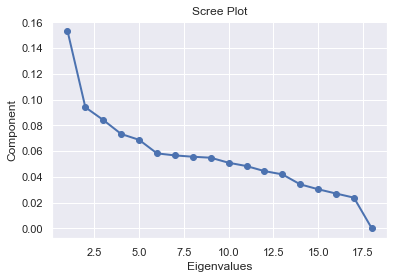

In [129]:
PC_values = np.arange(pca2.n_components_) + 1
plt.plot(PC_values, pca2.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Eigenvalues')
plt.ylabel('Component')
plt.show()

In [130]:
from scipy import stats


pca = PCA(n_components=14)
X_pca = pd.DataFrame(pca.fit_transform(X_3))
print(pca.explained_variance_ratio_)

[0.15335959 0.0939613  0.08411413 0.07324955 0.06873821 0.05822315
 0.05663819 0.05562108 0.05484257 0.05095351 0.04837749 0.04446486
 0.04194815 0.03418796]


In [131]:
sum(pca.explained_variance_ratio_)

0.918679735741927

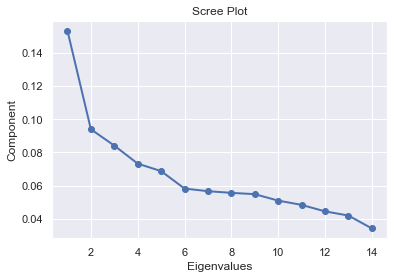

In [132]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Eigenvalues')
plt.ylabel('Component')
plt.show()

# Functions

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as metrics
import timeit

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [135]:
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

creating a predictive model, calculating accuracy and execution time

In [136]:
def predictions_model(X_train, X_test, Y_train, Y_test,model_pred):
    
    starttime = timeit.default_timer()
    
    model_pred.fit(X_train, Y_train)
    y_pred = model_pred.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    
    acc_m = round(accuracy,5)
    
    print('Accuracy is',acc_m)
    print(pd.DataFrame(confusion_matrix(Y_test,y_pred)))
    time_m = timeit.default_timer() - starttime
    print("Time is:", time_m)
    
    return acc_m, time_m

cross-validation process, calculating average, minimum and maximum accuracy and execution time

In [137]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

In [138]:
X_test2 = []
Y_test2 = []
X_train2 = []
Y_train2 = []
   
for train_index, test_index in skf.split(X, Y):
    X_test2 = X.loc[test_index,:]
    Y_test2 = Y.iloc[test_index,:]
    X_train2 = X.loc[train_index,:]
    Y_train2 = Y.iloc[train_index,:]

In [139]:
def predictions_model_val(model_pred):
    
    starttime = timeit.default_timer()
   
    fold = []
    for train_index,test_index in skf.split(X, Y):
        X_test2 = X.loc[test_index,:]
        Y_test2 = Y.iloc[test_index,:]
        X_train2 = X.loc[train_index,:]
        Y_train2 = Y.iloc[train_index,:]
    
        model_pred.fit(X_train2, Y_train2)
        y_pred = model_pred.predict(X_test2)
        accuracy=accuracy_score(Y_test2, y_pred)
        fold.append(accuracy)
        
        avg_val = round(np.mean(fold),5)
        max_val = round(max(fold),5)
        min_val = round(min(fold),5)
        
        
    print('Accuracy is',fold)
    print('Mean accuracy is',avg_val)
    print('Max accuracy is',max_val)
    print('Min accuracy is',min_val)
    time_val  = timeit.default_timer() - starttime
    print("Time wynosi:", time_val)
    
    return avg_val, max_val, min_val, time_val

Creating the ROC curve and calculating tha AUC coefficient

In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

def draw_roc_curve(model_pred):
    probs = model_pred.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('ROC curve', fontsize = 15)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r:')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.grid(True)
    
    return roc_auc

In [141]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def draw_roc_curve2(model_pred):
    y_score = model_pred.decision_function(X_test)

    fpr2, tpr2, _ = roc_curve(Y_test, y_score, pos_label=model_pred.classes_[1])
    roc_display = RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot()
    roc_auc2 = metrics.auc(fpr2, tpr2)
    plt.title('ROC curve', fontsize=15)
    plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f'%roc_auc2)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r:')

    plt.grid(True)
    
    return roc_auc2

Creating a precision-recall curve and calculating the AP coefficient

In [142]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

def draw_precision_recall_curve2(model_pred):
    disp = plot_precision_recall_curve(model_pred, X_test, Y_test)
    y_score2 = model_pred.decision_function(X_test)
    AP2 = average_precision_score(Y_test, y_score2)
    plt.grid(True)
    disp.ax_.set_title('Precision-recall curve'.format(AP2), fontsize=15)

    return AP2

In [143]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

def draw_precision_recall_curve(model_pred):
    disp = plot_precision_recall_curve(model_pred, X_test, Y_test)
    y_score = model_pred.predict_proba(X_test)[:, 1]
    AP = average_precision_score(Y_test, y_score)
    plt.grid(True)
    disp.ax_.set_title('Precision-recall curve'.format(AP), fontsize=15)

    return AP

Creating lift curve

In [144]:
import scikitplot as skplt

def lift_curve(model_pred):
    
    y_probas = model_pred.predict_proba(X_test)
    disp = skplt.metrics.plot_lift_curve(Y_test, y_probas)
    disp.set_title('Lift curve', fontsize=15)

In [145]:
all_models = pd.DataFrame(index = ['Logistic_regression', 'Decision_tree_e',
                                  'Random_forest', 'Bayes_Classificator', 'XGBoost', 'k_nearest_neighbors',
                                  'SVM_linear', 'SVM_gauss'], 
                          columns = ['Accuracy', 'Time' ,'AUC', 'AP',
                           'Accuracy_PCA', 'Time_PCA',
                          'Mean_accuracy_crossvalidation', 'Max_accuracy_crossvalidation',
                          'Min_accuracy_crossvalidation', 'Time_crossvalidation'])

# Logistic regression

Creating model

In [146]:
from sklearn.linear_model import LogisticRegression

regresja_logistyczna = LogisticRegression(random_state=42,fit_intercept=True,
                                          solver='lbfgs',max_iter=200)
regresja_logistyczna.fit(X_train, Y_train)

LogisticRegression(max_iter=200, random_state=42)

In [147]:
all_models['Accuracy']['Logistic_regression'], all_models['Time']['Logistic_regression'] = predictions_model(
    X_train, X_test, Y_train, Y_test, regresja_logistyczna) 

Accuracy is 0.78697
       0     1
0  19831  2047
1   5426  7776
Time is: 1.2658223999999976


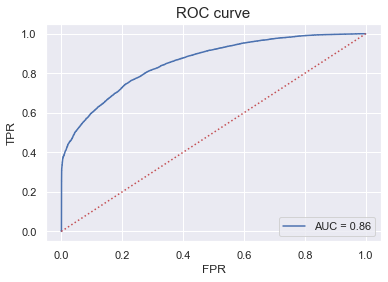

In [148]:
all_models['AUC']['Logistic_regression'] = draw_roc_curve(regresja_logistyczna)

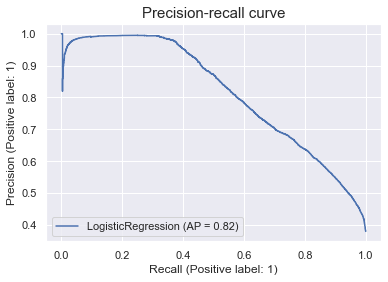

In [149]:
all_models['AP']['Logistic_regression'] = draw_precision_recall_curve(regresja_logistyczna)

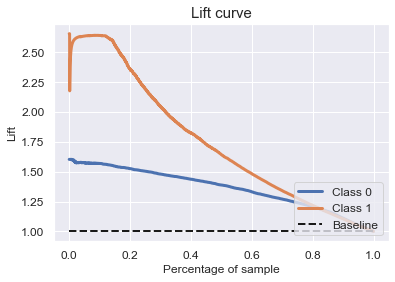

In [150]:
lift_curve(regresja_logistyczna)

Model with data after dimension reduction

In [151]:
all_models['Accuracy_PCA']['Logistic_regression'],all_models['Time_PCA']['Logistic_regression']= predictions_model(
    X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,regresja_logistyczna)

Accuracy is 0.7833
       0     1
0  19475  2403
1   5199  8003
Time is: 0.14977329999999967


Crosvalidation

In [152]:
cross_reg = predictions_model_val(regresja_logistyczna)

Accuracy is [0.7889425749347928, 0.7873514068245959, 0.7920978363123237, 0.7880355768408449, 0.7931240913366971]
Mean accuracy is 0.78991
Max accuracy is 0.79312
Min accuracy is 0.78735
Time wynosi: 6.2953879000000015


In [153]:
all_models['Mean_accuracy_crossvalidation']['Logistic_regression'] = cross_reg[0]
all_models['Max_accuracy_crossvalidation']['Logistic_regression'] = cross_reg[1]
all_models['Min_accuracy_crossvalidation']['Logistic_regression'] = cross_reg[2]
all_models['Time_crossvalidation']['Logistic_regression'] = cross_reg[3]


In [154]:
p = regresja_logistyczna.intercept_
print("The shift of the decision function is ", p)

The shift of the decision function is  [-0.74774388]


In [155]:
print("The base probability of the is_canceled feature is ", np.exp(p)/(1+np.exp(p)))

The base probability of the is_canceled feature is  [0.3213131]


In [156]:
print("Logistic regression coefficients:",regresja_logistyczna.coef_)

Logistic regression coefficients: [[-0.34439303  0.0040135   0.04258168  0.39346049  0.97040368  2.65074741
  -3.63240227 -0.5546118  -2.50511602 -0.46314381  0.00455485 -0.35588415
  -0.92909932 -1.14491735 -0.53835434  0.59722969  0.18514919  0.15485226]]


# Decision tree - gini 

In [157]:
from sklearn.tree import DecisionTreeClassifier

drzewo_decyzyjne_g = DecisionTreeClassifier(criterion='gini', 
                                            max_depth=30, min_samples_split=5,random_state=42)

In [158]:
predictions_model(X_train, X_test, Y_train, Y_test,drzewo_decyzyjne_g)

Accuracy is 0.82603
       0     1
0  19149  2729
1   3374  9828
Time is: 0.33641219999999805


(0.82603, 0.33641219999999805)

0.8423918513760578

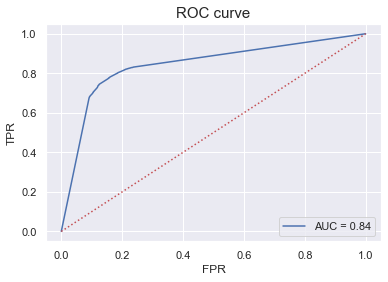

In [159]:
draw_roc_curve(drzewo_decyzyjne_g)

0.7334489929336274

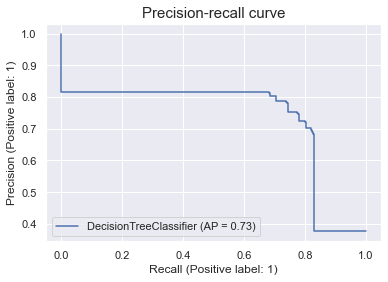

In [160]:
draw_precision_recall_curve(drzewo_decyzyjne_g)

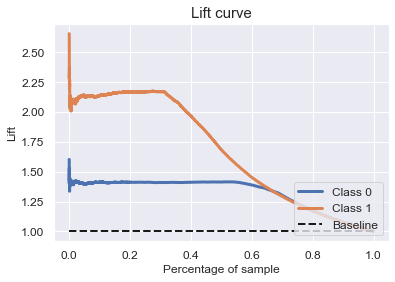

In [161]:
lift_curve(drzewo_decyzyjne_g)

PCA

In [162]:
predictions_model(X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,drzewo_decyzyjne_g) #0.81 21.59

Accuracy is 0.80887
       0     1
0  18729  3149
1   3556  9646
Time is: 1.5511268999999999


(0.80887, 1.5511268999999999)

Crossvalidation

In [163]:
cross = predictions_model_val(drzewo_decyzyjne_g)

Accuracy is [0.826826869628426, 0.8290857778157872, 0.8295133840759429, 0.8265629008808689, 0.8325066278970324]
Mean accuracy is 0.8289
Max accuracy is 0.83251
Min accuracy is 0.82656
Time wynosi: 1.6707292999999979


Testing the significance of individual variables

In [164]:
pd.DataFrame({'feature':X_train.columns, 'significance ':drzewo_decyzyjne_g.feature_importances_}).sort_values('significance ', ascending=False)

,feature,significance
6,no_deposit,0.262558
1,lead_time,0.226157
10,adr,0.193653
2,total_nights,0.060581
15,2cot,0.038361
5,room,0.037717
9,total_of_special_requests,0.035613
8,required_car_parking_spaces,0.029478
3,guests,0.027062
11,booking_changes,0.023422


# Decision Tree - Entropy

In [165]:
from sklearn.tree import DecisionTreeClassifier

drzewo_decyzyjne_e = DecisionTreeClassifier(criterion='entropy', splitter='best',
                                            max_depth=30,min_samples_split=5,random_state=42)

In [166]:
all_models['Accuracy']['Decision_tree_e'], all_models['Time']['Decision_tree_e'] =predictions_model(X_train, X_test, Y_train, Y_test,drzewo_decyzyjne_e)

Accuracy is 0.82551
       0     1
0  19112  2766
1   3355  9847
Time is: 0.37981169999999764


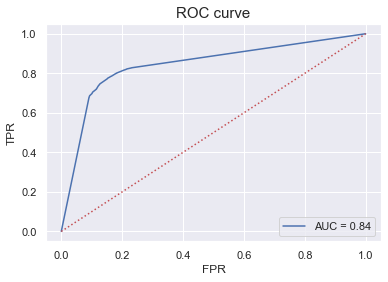

In [167]:
all_models['AUC']['Decision_tree_e'] =draw_roc_curve(drzewo_decyzyjne_e)

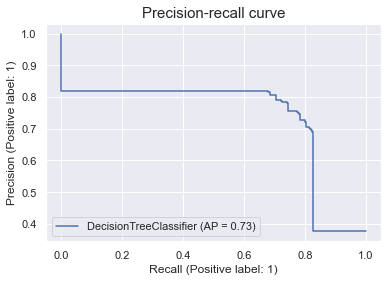

In [168]:
all_models['AP']['Decision_tree_e'] = draw_precision_recall_curve(drzewo_decyzyjne_e)

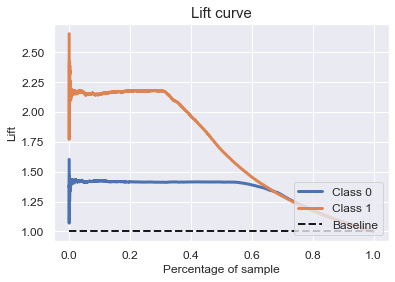

In [169]:
lift_curve(drzewo_decyzyjne_e)

PCA

In [170]:
all_models['Accuracy_PCA']['Decision_tree_e'],all_models['Time_PCA']['Decision_tree_e']=predictions_model(X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,drzewo_decyzyjne_e)

Accuracy is 0.81528
       0     1
0  18774  3104
1   3376  9826
Time is: 2.3128122999999974


Crossvalidation

In [171]:
cross = predictions_model_val(drzewo_decyzyjne_e)

Accuracy is [0.828708256723821, 0.8268622252629778, 0.829898229710083, 0.8316086547507056, 0.8328059522791413]
Mean accuracy is 0.82998
Max accuracy is 0.83281
Min accuracy is 0.82686
Time wynosi: 1.7756814999999975


In [172]:
all_models['Mean_accuracy_crossvalidation']['Decision_tree_e'] = cross[0]
all_models['Max_accuracy_crossvalidation']['Decision_tree_e'] = cross[1]
all_models['Min_accuracy_crossvalidation']['Decision_tree_e'] = cross[2]
all_models['Time_crossvalidation']['Decision_tree_e'] = cross[3]


Testing the significance of individual variables

In [173]:
pd.DataFrame({'feature':X_train.columns, 'significance':drzewo_decyzyjne_e.feature_importances_}).sort_values('significance', ascending=False)

,feature,significance
1,lead_time,0.227448
6,no_deposit,0.224728
10,adr,0.208933
2,total_nights,0.064839
5,room,0.042876
15,2cot,0.040856
8,required_car_parking_spaces,0.036098
9,total_of_special_requests,0.032773
3,guests,0.027340
11,booking_changes,0.022953


In [174]:
print("The number of leaves in a tree is ",drzewo_decyzyjne_e.get_n_leaves())

The number of leaves in a tree is  10239


# Random forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

las_losowy = RandomForestClassifier(max_depth=30, max_features=12,min_samples_split=5,
                                    min_samples_leaf=5, n_estimators=25,random_state=42,
                                   bootstrap=True)

In [176]:
all_models['Accuracy']['Random_forest'], all_models['Time']['Random_forest'] =predictions_model(X_train, X_test, Y_train, Y_test,las_losowy)

Accuracy is 0.84906
       0     1
0  20002  1876
1   3419  9783
Time is: 2.9866281999999984


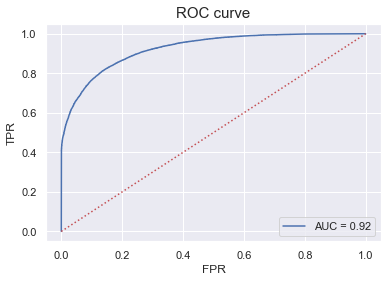

In [177]:
all_models['AUC']['Random_forest'] =draw_roc_curve(las_losowy)

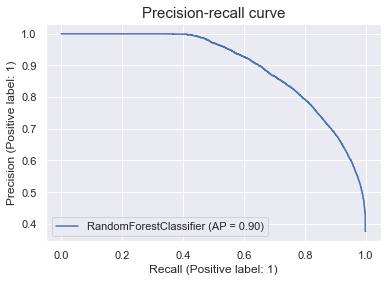

In [178]:
all_models['AP']['Random_forest'] =draw_precision_recall_curve(las_losowy)

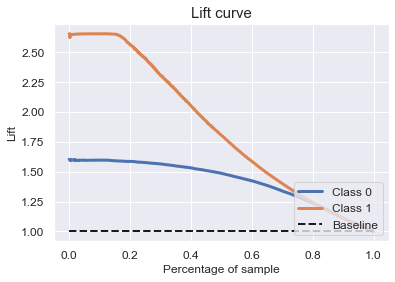

In [179]:
lift_curve(las_losowy)

PCA

In [180]:
all_models['Accuracy_PCA']['Random_forest'],all_models['Time_PCA']['Random_forest']=predictions_model(X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,las_losowy)

Accuracy is 0.84242
       0     1
0  19957  1921
1   3607  9595
Time is: 18.9011426


Crossvalidation

In [181]:
cross = predictions_model_val(las_losowy)

Accuracy is [0.8535938769401804, 0.8533310527666125, 0.8532455315145814, 0.8547421534251262, 0.8578636791242624]
Mean accuracy is 0.85456
Max accuracy is 0.85786
Min accuracy is 0.85325
Time wynosi: 16.714407300000005


In [182]:
all_models['Mean_accuracy_crossvalidation']['Random_forest'] = cross[0]
all_models['Max_accuracy_crossvalidation']['Random_forest'] = cross[1]
all_models['Min_accuracy_crossvalidation']['Random_forest'] = cross[2]
all_models['Time_crossvalidation']['Random_forest'] = cross[3]


Testing the significance of individual variables

In [183]:
pd.DataFrame({'feature':X_train.columns, 'significance':las_losowy.feature_importances_}).sort_values('significance', ascending=False)

,feature,significance
6,no_deposit,0.291487
1,lead_time,0.189235
10,adr,0.162953
15,2cot,0.070915
2,total_nights,0.047596
5,room,0.044158
9,total_of_special_requests,0.038549
8,required_car_parking_spaces,0.033527
4,previous_cancellations,0.027494
11,booking_changes,0.024201


# Bayesian classifier

In [184]:
from sklearn.naive_bayes import BernoulliNB

klasyfikator_bayesa = BernoulliNB()

In [185]:
all_models['Accuracy']['Bayes_Classificator'], all_models['Time']['Bayes_Classificator'] =predictions_model(X_train, X_test, Y_train, Y_test,klasyfikator_bayesa)

Accuracy is 0.76294
       0     1
0  19202  2676
1   5640  7562
Time is: 0.10618819999999118


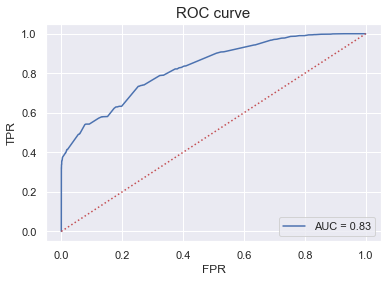

In [186]:
all_models['AUC']['Bayes_Classificator'] =draw_roc_curve(klasyfikator_bayesa)

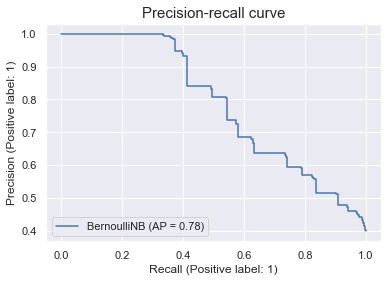

In [187]:
all_models['AP']['Bayes_Classificator'] =draw_precision_recall_curve(klasyfikator_bayesa)

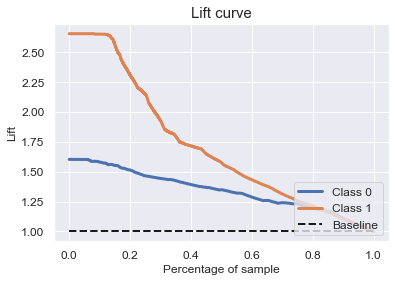

In [188]:
lift_curve(klasyfikator_bayesa)

PCA

In [189]:
all_models['Accuracy_PCA']['Bayes_Classificator'],all_models['Time_PCA']['Bayes_Classificator']=predictions_model(X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,klasyfikator_bayesa)

Accuracy is 0.71117
       0     1
0  18427  3451
1   6681  6521
Time is: 0.1094920999999971


Crossvalidation

In [190]:
cross = predictions_model_val(klasyfikator_bayesa)

Accuracy is [0.769145251635524, 0.766612503207047, 0.7696057470281364, 0.7652441631745489, 0.7665269819550158]
Mean accuracy is 0.76743
Max accuracy is 0.76961
Min accuracy is 0.76524
Time wynosi: 0.3612102999999962


In [191]:
all_models['Mean_accuracy_crossvalidation']['Bayes_Classificator'] = cross[0]
all_models['Max_accuracy_crossvalidation']['Bayes_Classificator'] = cross[1]
all_models['Min_accuracy_crossvalidation']['Bayes_Classificator'] = cross[2]
all_models['Time_crossvalidation']['Bayes_Classificator'] = cross[3]


# XGBoost

In [192]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(max_depth=30,n_estimators=250,min_child_weight=6,
                        random_state=42)

In [193]:
all_models['Accuracy']['XGBoost'], all_models['Time']['XGBoost'] = predictions_model(X_train, X_test, Y_train, Y_test,xgboost)

[14:51:29] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is 0.85607
       0      1
0  19793   2085
1   2964  10238
Time is: 31.487052500000004


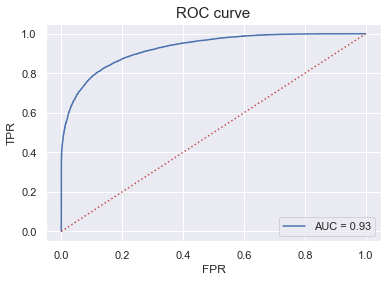

In [194]:
all_models['AUC']['XGBoost'] = draw_roc_curve(xgboost)

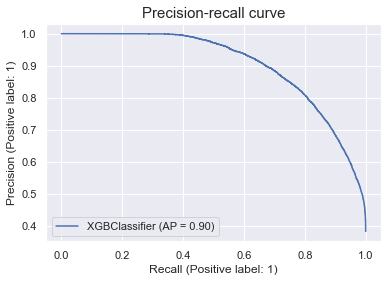

In [195]:
all_models['AP']['XGBoost'] =draw_precision_recall_curve(xgboost)

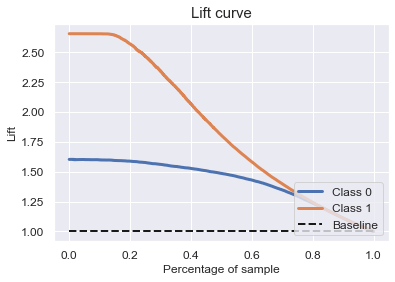

In [196]:
lift_curve(xgboost)

PCA

In [197]:
all_models['Accuracy_PCA']['XGBoost'],all_models['Time_PCA']['XGBoost']=predictions_model(X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,xgboost)

[14:52:03] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is 0.83903
       0     1
0  19577  2301
1   3346  9856
Time is: 106.033526


Crossvalidation

In [198]:
cross = predictions_model_val(xgboost)

[14:53:49] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:25] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:02] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:38] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation me

In [199]:
all_models['Mean_accuracy_crossvalidation']['XGBoost'] = cross[0]
all_models['Max_accuracy_crossvalidation']['XGBoost'] = cross[1]
all_models['Min_accuracy_crossvalidation']['XGBoost'] = cross[2]
all_models['Time_crossvalidation']['XGBoost'] = cross[3]


Testing the significance of individual variables

In [200]:
pd.DataFrame({'feature':X_train.columns, 'significance':xgboost.feature_importances_}).sort_values('significance', ascending=False)

,feature,significance
6,no_deposit,0.660308
8,required_car_parking_spaces,0.203191
5,room,0.036258
4,previous_cancellations,0.027776
15,2cot,0.017371
17,4cot,0.014146
7,group,0.009445
11,booking_changes,0.005534
12,is_repeated_guest,0.005016
13,0cot,0.004018


# k nearest neighbors

In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski', weights='distance')

In [202]:
all_models['Accuracy']['k_nearest_neighbors'], all_models['Time']['k_nearest_neighbors'] =predictions_model(X_train, X_test, Y_train, Y_test,knn)

Accuracy is 0.79974
       0     1
0  19026  2852
1   4173  9029
Time is: 50.40499629999999


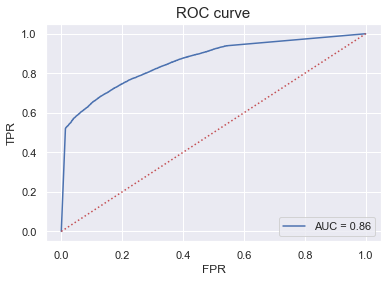

In [203]:
all_models['AUC']['k_nearest_neighbors'] =draw_roc_curve(knn)

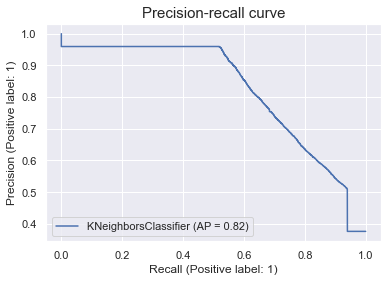

In [204]:
all_models['AP']['k_nearest_neighbors'] =draw_precision_recall_curve(knn)

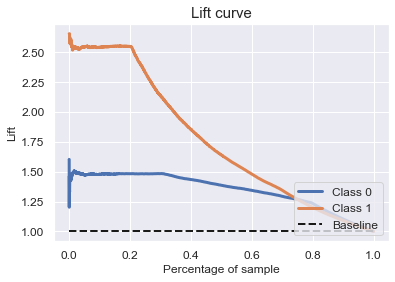

In [205]:
lift_curve(knn)

PCA

In [206]:
all_models['Accuracy_PCA']['k_nearest_neighbors'],all_models['Time_PCA']['k_nearest_neighbors']=predictions_model(X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,knn)

Accuracy is 0.84002
       0     1
0  19524  2354
1   3258  9944
Time is: 2.3938245000000506


Crossvalidation

In [207]:
cross = predictions_model_val(knn)

Accuracy is [0.8036943601145936, 0.8036004447105105, 0.8049687847430086, 0.7995381852390319, 0.8053963910031643]
Mean accuracy is 0.80344
Max accuracy is 0.8054
Min accuracy is 0.79954
Time wynosi: 173.46852009999998


In [208]:
all_models['Mean_accuracy_crossvalidation']['k_nearest_neighbors'] = cross[0]
all_models['Max_accuracy_crossvalidation']['k_nearest_neighbors'] = cross[1]
all_models['Min_accuracy_crossvalidation']['k_nearest_neighbors'] = cross[2]
all_models['Time_crossvalidation']['k_nearest_neighbors'] = cross[3]


# SVM linear

In [209]:
from sklearn import svm
from sklearn.svm import LinearSVC

svm_l = svm.LinearSVC(random_state=42, C=0.5)

In [210]:
all_models['Accuracy']['SVM_linear'], all_models['Time']['SVM_linear'] =predictions_model(X_train, X_test, Y_train, Y_test,svm_l)

Accuracy is 0.60884
      0      1
0  8998  12880
1   842  12360
Time is: 10.522801200000004


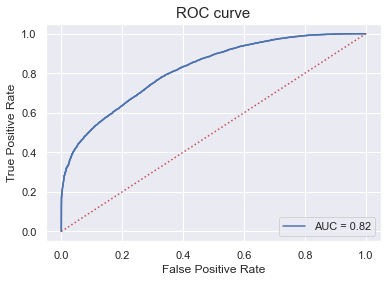

In [211]:
all_models['AUC']['SVM_linear'] =draw_roc_curve2(svm_l)

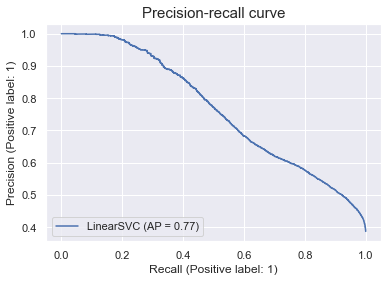

In [212]:
all_models['AP']['SVM_linear'] =draw_precision_recall_curve2(svm_l)

In [213]:
all_models['Accuracy_PCA']['SVM_linear'],all_models['Time_PCA']['SVM_linear']=predictions_model(X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,svm_l)

Accuracy is 0.78224
       0     1
0  19639  2239
1   5400  7802
Time is: 12.26668170000005


In [214]:
cross = predictions_model_val(svm_l)

Accuracy is [0.7635866079445846, 0.7051227229966647, 0.7621226374754126, 0.6630890276233644, 0.49982895749593775]
Mean accuracy is 0.67875
Max accuracy is 0.76359
Min accuracy is 0.49983
Time wynosi: 59.641270899999995


In [215]:
all_models['Mean_accuracy_crossvalidation']['SVM_linear'] = cross[0]
all_models['Max_accuracy_crossvalidation']['SVM_linear'] = cross[1]
all_models['Min_accuracy_crossvalidation']['SVM_linear'] = cross[2]
all_models['Time_crossvalidation']['SVM_linear'] = cross[3]


# SVM gauss

In [216]:
from sklearn.svm import SVC
from sklearn import svm

svm_g = svm.SVC(kernel='rbf',random_state=42)

In [217]:
all_models['Accuracy']['SVM_gauss'], all_models['Time']['SVM_gauss'] =predictions_model(X_train, X_test, Y_train, Y_test,svm_g)

Accuracy is 0.73233
       0     1
0  20695  1183
1   8207  4995
Time is: 469.4834357


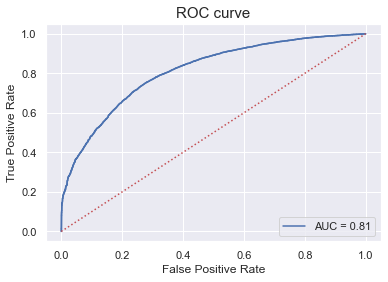

In [218]:
all_models['AUC']['SVM_gauss'] =draw_roc_curve2(svm_g)

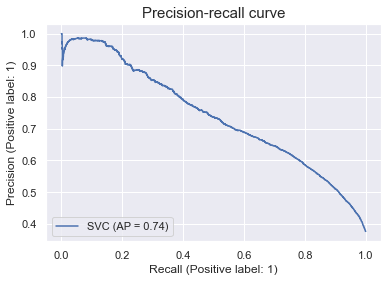

In [219]:
all_models['AP']['SVM_gauss'] =draw_precision_recall_curve2(svm_g)

In [220]:
all_models['Accuracy_PCA']['SVM_gauss'],all_models['Time_PCA']['SVM_gauss']=predictions_model(X_pca_train, X_pca_test, Y_pca_train, Y_pca_test,svm_g)

Accuracy is 0.81328
       0     1
0  20228  1650
1   4900  8302
Time is: 321.26393099999996


In [221]:
cross = predictions_model_val(svm_g)

Accuracy is [0.7410527215974687, 0.7447618233130933, 0.746172923971607, 0.7430941588984863, 0.7436072864106731]
Mean accuracy is 0.74374
Max accuracy is 0.74617
Min accuracy is 0.74105
Time wynosi: 2295.0202174


In [222]:
all_models['Mean_accuracy_crossvalidation']['SVM_gauss'] = cross[0]
all_models['Max_accuracy_crossvalidation']['SVM_gauss'] = cross[1]
all_models['Min_accuracy_crossvalidation']['SVM_gauss'] = cross[2]
all_models['Time_crossvalidation']['SVM_gauss'] = cross[3]


In [223]:
all_models

,Accuracy,Time,AUC,AP,Accuracy_PCA,Time_PCA,Mean_accuracy_crossvalidation,Max_accuracy_crossvalidation,Min_accuracy_crossvalidation,Time_crossvalidation
Logistic_regression,0.78697,1.265822,0.856551,0.817409,0.7833,0.149773,0.78991,0.79312,0.78735,6.295388
Decision_tree_e,0.82551,0.379812,0.841964,0.733866,0.81528,2.312812,0.82998,0.83281,0.82686,1.775681
Random_forest,0.84906,2.986628,0.92424,0.899639,0.84242,18.901143,0.85456,0.85786,0.85325,16.714407
Bayes_Classificator,0.76294,0.106188,0.829214,0.784842,0.71117,0.109492,0.76743,0.76961,0.76524,0.36121
XGBoost,0.85607,31.487053,0.926324,0.903388,0.83903,106.033526,0.85737,0.86116,0.85354,181.04539
k_nearest_neighbors,0.79974,50.404996,0.860626,0.822677,0.84002,2.393825,0.80344,0.8054,0.79954,173.46852
SVM_linear,0.60884,10.522801,0.818678,0.765762,0.78224,12.266682,0.67875,0.76359,0.49983,59.641271
SVM_gauss,0.73233,469.483436,0.811281,0.741782,0.81328,321.263931,0.74374,0.74617,0.74105,2295.020217


# Results

* Tree-based models (Decision Trees, Random Forest, XGBoost) provide the highest accuracy.
* Bayes Classifier performs worst (unsuitable for large datasets).
* SVM and XGBoost require longer training times.
* PCA improves accuracy only in selected algorithms.
* Cross-validation enhances reliability but increases computation time.

In [224]:
allmodels2 = all_models.copy()

In [225]:
allmodels2 = allmodels2.rename(index={'Regresja_logistyczna':'Reg_Log', 'Drzewo_decyzyjne_e':'Drzewo', 'Las_losowy':'Las',
                        'Klasyfikator_Bayesa': 'K_Bayesa', 'k_najbliższych_sąsiadów':'knn',
                        'SVM_liniowe':'SVMl', 'SVM_gaussowskie':'SVMg'})

<Figure size 800x800 with 0 Axes>

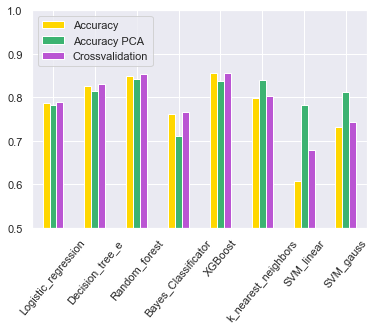

In [226]:
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

index = allmodels2.index
df_temp = pd.DataFrame({'model': index, 'Accuracy':allmodels2['Accuracy'],
                       'Accuracy PCA':allmodels2['Accuracy_PCA'],
                       'Crossvalidation':allmodels2['Mean_accuracy_crossvalidation']})
ax = df_temp.plot.bar(rot=50, color = ['gold', 'mediumseagreen', 'mediumorchid'])
plt.ylim([0.5,1])
ax.legend(loc=2)

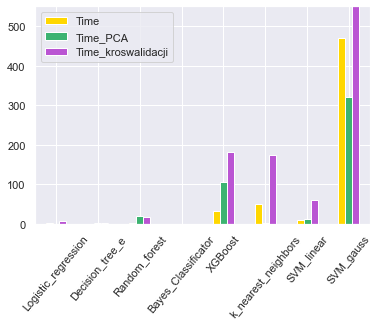

In [227]:
index = allmodels2.index
df_temp = pd.DataFrame({'model': index, 'Time':allmodels2['Time'],
                       'Time_PCA':allmodels2['Time_PCA'],
                       'Time_kroswalidacji':allmodels2['Time_crossvalidation']})
ax = df_temp.plot.bar(rot=50, color = ['gold', 'mediumseagreen', 'mediumorchid'])
plt.ylim([0,550])
ax.legend(loc=2)

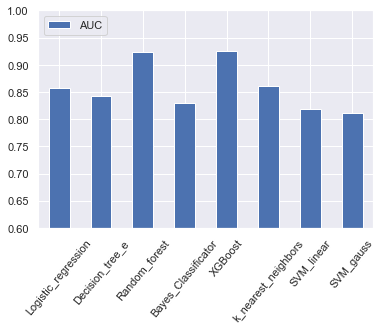

In [228]:
allmodels2.plot.bar(y = 'AUC',rot=50)
plt.ylim([0.6,1])
plt.legend(loc=2)

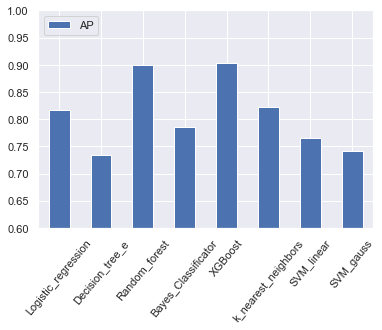

In [229]:
allmodels2.plot.bar(y = 'AP',rot=50)
plt.ylim([0.6,1])
plt.legend(loc=2)

In [230]:
all_models = all_models.astype(float, errors='raise')

In [231]:
all_models.corr(method ='pearson')

,Accuracy,Time,AUC,AP,Accuracy_PCA,Time_PCA,Mean_accuracy_crossvalidation,Max_accuracy_crossvalidation,Min_accuracy_crossvalidation,Time_crossvalidation
Accuracy,1.000000,-0.211840,0.743055,0.582124,0.453262,-0.108398,0.984502,0.802298,0.980607,-0.213358
Time,-0.211840,1.000000,-0.400279,-0.375799,0.149283,0.955491,-0.295657,-0.513754,-0.074263,0.999322
AUC,0.743055,-0.400279,1.000000,0.941986,0.578098,-0.209081,0.821517,0.907081,0.629516,-0.394001
AP,0.582124,-0.375799,0.941986,1.000000,0.434486,-0.202146,0.645516,0.726767,0.484183,-0.371779
Accuracy_PCA,0.453262,0.149283,0.578098,0.434486,1.000000,0.217300,0.527263,0.607749,0.379820,0.141949
Time_PCA,-0.108398,0.955491,-0.209081,-0.202146,0.217300,1.000000,-0.169586,-0.344923,-0.000527,0.962940
Mean_accuracy_crossvalidation,0.984502,-0.295657,0.821517,0.645516,0.527263,-0.169586,1.000000,0.893744,0.932815,-0.295242
Max_accuracy_crossvalidation,0.802298,-0.513754,0.907081,0.726767,0.607749,-0.344923,0.893744,1.000000,0.672140,-0.508465
Min_accuracy_crossvalidation,0.980607,-0.074263,0.629516,0.484183,0.379820,-0.000527,0.932815,0.672140,1.000000,-0.077496
Time_crossvalidation,-0.213358,0.999322,-0.394001,-0.371779,0.141949,0.962940,-0.295242,-0.508465,-0.077496,1.000000
